# Analyze Prometheus Data and Obtain Report

In [49]:
from analyze import analyze_data
from utils import RequestData
import json
from datetime import datetime
from zoneinfo import ZoneInfo
import re
# run_log_dir = "/mnt/network_drive/lrq/logs/logs_2025-10-29-16-37-45/run_0" # tokenpipe
# run_log_dir = "/mnt/network_drive/lrq/logs/logs_2025-11-15-19-18-19/run_0" # distserve
run_log_dir = "/mnt/network_drive/lrq/logs/logs_2026-01-30-16-51-13/run_0" # distserve new

GRAN = "30s"
memory_metric = "vllm:gpu_cache_usage_perc"
compute_metric = f"rate(vllm:iteration_tokens_total_sum[{GRAN}]) / rate(vllm:iteration_tokens_total_count[{GRAN}])"
queue_metric = f"rate(vllm:request_queue_time_seconds_sum[{GRAN}])"
throughput_metric = f"rate(vllm:iteration_tokens_total_sum[{GRAN}])"
num_seq_metric = f"vllm:num_requests_running"
# throughput_metric = f"vllm:avg_generation_throughput_toks_per_s"
req_counter_metric = f"router:req_counter"
rps_counter_metric = f"router:rps_counter"
tok_counter_metric = f"router:tok_counter"
tps_counter_metric = f"router:tps_counter"
ins_counter_metric = f"router:ins_counter"
ins_needed_metric = f"router:ins_needed"
tps_counter_map_metric = f"router:tps_counter_map"
coldstart_metric = f"router:create_instance_duration_seconds"
metrics_list = [memory_metric, compute_metric, throughput_metric, req_counter_metric, ins_counter_metric, ins_needed_metric, tok_counter_metric, queue_metric, rps_counter_metric, coldstart_metric, tps_counter_metric, tps_counter_map_metric, num_seq_metric]
report_file_path = analyze_data(run_log_dir, metrics_list)
with open(report_file_path, 'r') as f:
    report = json.load(f)

loadgen_data = report['loadgen_data']
total_request_count = len(loadgen_data)
no_response_count = 0
error_count = 0
skip_prefill_requests = []
requests = []
for request_data in loadgen_data:
    if 'error' not in request_data.keys():
        # if request.waiting_latency >= 0.2:
        #     request.waiting_latency = 0.01
        #     request.tpot = (request.decode_latency + request.waiting_latency) / request.decode_tokens
        request = RequestData.init_from_dict(request_data)
        requests.append(request)
        if request.waiting_latency == 0:
            skip_prefill_requests.append(request)
        continue

    if request_data == {'error': 'No response!'}:
        no_response_count += 1
    else:
        error_count += 1
        print(request_data)

print(f"Total request: {total_request_count}, no response: {no_response_count}, error: {error_count}, skip prefill: {len(skip_prefill_requests)}")
recv_kv_failed_requests = report['recv_failed_requests']
print(f"There are totally {len(recv_kv_failed_requests)} requests fall back to model forwarding!")

start_str = report.get('router_start_time', 'N/A')
end_str = report.get('router_end_time', 'N/A')
print(start_str, end_str)
tz_sg = ZoneInfo("Asia/Singapore")
router_start_time = datetime.fromisoformat(start_str).replace(tzinfo=tz_sg).timestamp()
router_end_time = datetime.fromisoformat(end_str).replace(tzinfo=tz_sg).timestamp()
pattern = re.compile(r"^(\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2}) Finished preparing http requests")
with open(f"{run_log_dir}/loadgen.err") as f:
    for line in f:
        m = pattern.match(line)
        if m:
            dt = datetime.strptime(m.group(1), "%Y/%m/%d %H:%M:%S").replace(tzinfo=tz_sg)
            break

first_request_sendtime = dt.timestamp() + 5
print(f"Router start time: {router_start_time}, end time: {router_end_time}, first_request_sendtime: {first_request_sendtime - router_start_time}s")

Copying Prometheus snapshot from /data/metrics to /app/prometheus_restore...
Starting Prometheus from restored snapshot...


ts=2026-01-30T09:00:07.216Z caller=main.go:573 level=info msg="No time or size retention was set so using the default time retention" duration=15d
ts=2026-01-30T09:00:07.216Z caller=main.go:617 level=info msg="Starting Prometheus Server" mode=server version="(version=2.52.0, branch=HEAD, revision=879d80922a227c37df502e7315fad8ceb10a986d)"
ts=2026-01-30T09:00:07.216Z caller=main.go:622 level=info build_context="(go=go1.22.3, platform=linux/amd64, user=root@1b4f4c206e41, date=20240508-21:56:43, tags=netgo,builtinassets,stringlabels)"
ts=2026-01-30T09:00:07.216Z caller=main.go:623 level=info host_details="(Linux 6.6.87.2-microsoft-standard-WSL2 #1 SMP PREEMPT_DYNAMIC Thu Jun  5 18:30:46 UTC 2025 x86_64 80f9fc0b32d9 student.main.ntu.edu.sg)"
ts=2026-01-30T09:00:07.216Z caller=main.go:624 level=info fd_limits="(soft=1048576, hard=1048576)"
ts=2026-01-30T09:00:07.216Z caller=main.go:625 level=info vm_limits="(soft=unlimited, hard=unlimited)"
ts=2026-01-30T09:00:07.220Z caller=web.go:568 leve

Running Python app...
query_metrics_list: ['vllm:gpu_cache_usage_perc', 'rate(vllm:iteration_tokens_total_sum[30s]) / rate(vllm:iteration_tokens_total_count[30s])', 'rate(vllm:iteration_tokens_total_sum[30s])', 'router:req_counter', 'router:ins_counter', 'router:ins_needed', 'router:tok_counter', 'rate(vllm:request_queue_time_seconds_sum[30s])', 'router:rps_counter', 'router:create_instance_duration_seconds', 'router:tps_counter', 'router:tps_counter_map', 'vllm:num_requests_running']
params_list: [{'query': 'vllm:gpu_cache_usage_perc', 'start': '2026-01-30T08:54:19Z', 'end': '2026-01-30T10:54:19Z', 'step': '1s'}, {'query': 'rate(vllm:iteration_tokens_total_sum[30s]) / rate(vllm:iteration_tokens_total_count[30s])', 'start': '2026-01-30T08:54:19Z', 'end': '2026-01-30T10:54:19Z', 'step': '1s'}, {'query': 'rate(vllm:iteration_tokens_total_sum[30s])', 'start': '2026-01-30T08:54:19Z', 'end': '2026-01-30T10:54:19Z', 'step': '1s'}, {'query': 'router:req_counter', 'start': '2026-01-30T08:54:19

# Plot Prometheus Data

In [50]:
import matplotlib.pyplot as plt
from datetime import datetime
def add_metric_plot(metrics, metric_name: str, ax, color, ylabel):
    series = metrics.get(metric_name, [])
    times = [float(t[0]) - router_start_time for t in series]
    values = [float(t[1]) for t in series]
    if times == []:
        return
    sorted_pairs = sorted(zip(times, values))
    times_sorted, values_sorted = zip(*sorted_pairs)

    ax.plot(times_sorted, values_sorted, color=color)
    ax.set_xlim(first_request_sendtime - router_start_time, router_end_time - router_start_time)
    ax.set_ylabel(ylabel, color=color)

# GPU Specific Metrics

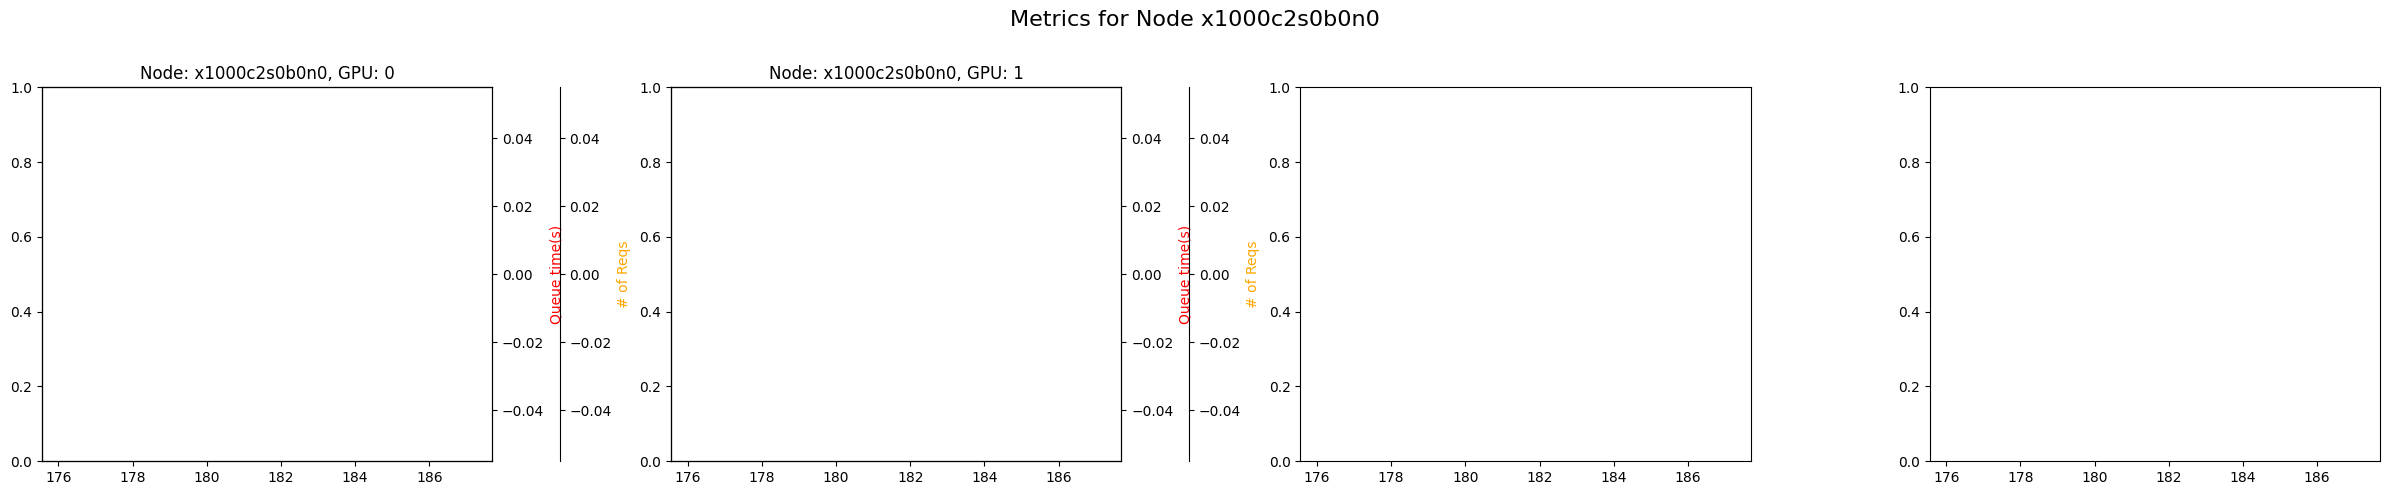

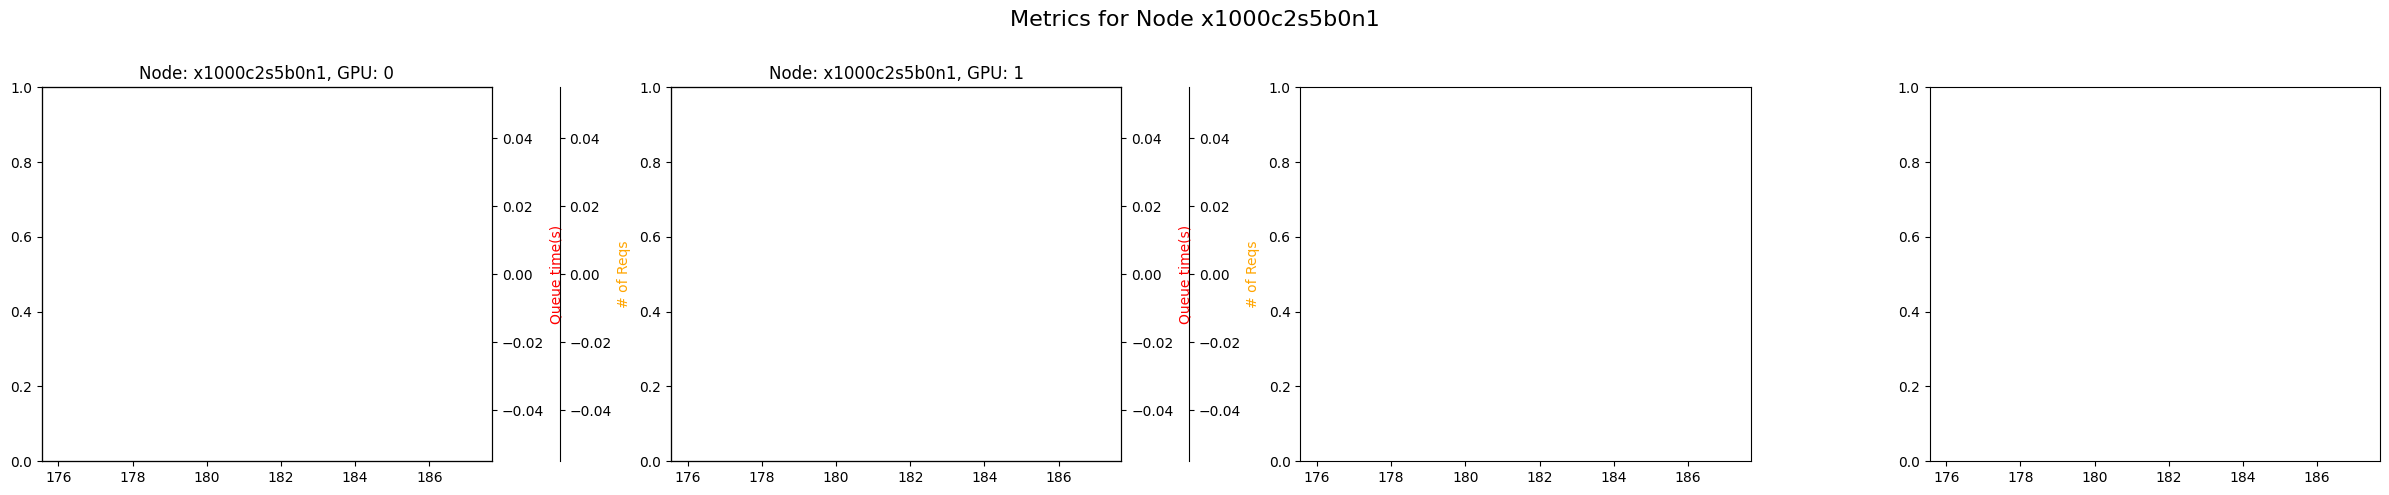

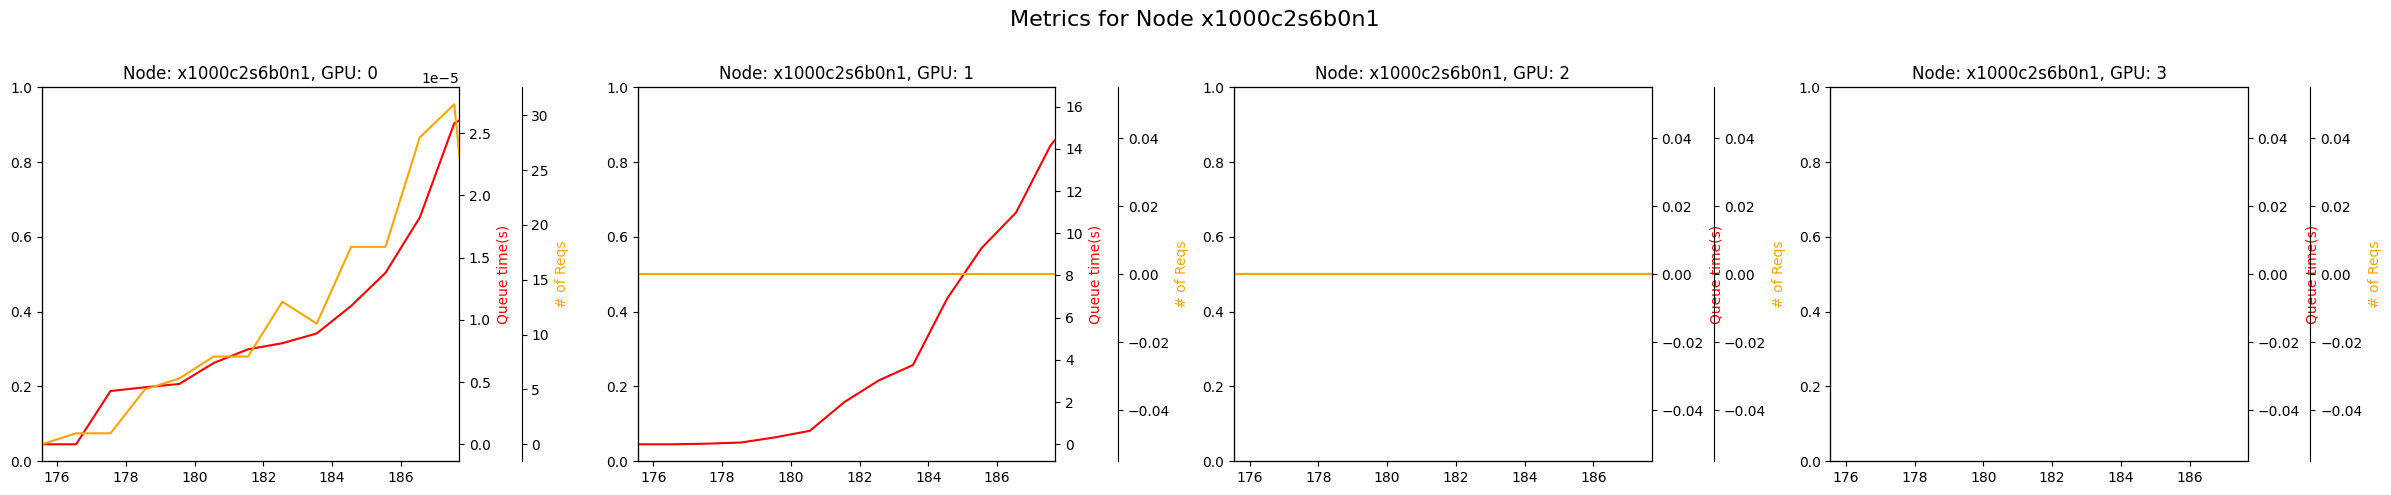

In [51]:
from collections import defaultdict
import math
import matplotlib.pyplot as plt

# Group metrics by node
data = report['prom_data']
node_data = defaultdict(dict)

for instance_uuid, metrics in data.items():
    if instance_uuid == "router": 
        continue
    node, gpu_str = instance_uuid.split("::")
    
    if "," in gpu_str:
        for gpu_id_str in gpu_str.split(','):
            gpu_id = int(gpu_id_str.strip())
            node_data[node][gpu_id]= metrics
    else:
        gpu_id = int(gpu_str)
        node_data[node][gpu_id] = metrics

# Plot per node
for node, gpu_metrics in node_data.items():
    max_gpu_id = max(gpu_metrics.keys())
    nrows = math.ceil((max_gpu_id + 1) / 4)
    ncols = 4

    fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 5 * nrows), sharex=True)
    axes = axes.reshape(nrows, ncols)

    for gpu_id, metrics in gpu_metrics.items():
        row, col = divmod(gpu_id, 4)
        ax = axes[row, col]

        add_metric_plot(metrics, memory_metric, ax, color="blue", ylabel="KVC Usage")
        ax.set_ylim([0, 1])

        ax2 = ax.twinx()
        add_metric_plot(metrics, queue_metric, ax2, color="red", ylabel="Queue time(s)")
        ax3 = ax.twinx()
        ax3.spines["right"].set_position(("axes", 1.15))
        add_metric_plot(metrics, num_seq_metric, ax3, color="orange", ylabel="# of Reqs")

        ax.set_title(f"Node: {node}, GPU: {gpu_id}")


    plt.suptitle(f"Metrics for Node {node}", fontsize=16)
    plt.xlabel("Time")
    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for suptitle
    plt.show()

# Receiver Specific Data

Model meta-llama/Llama-3.1-8B::prefill has 6 instances.


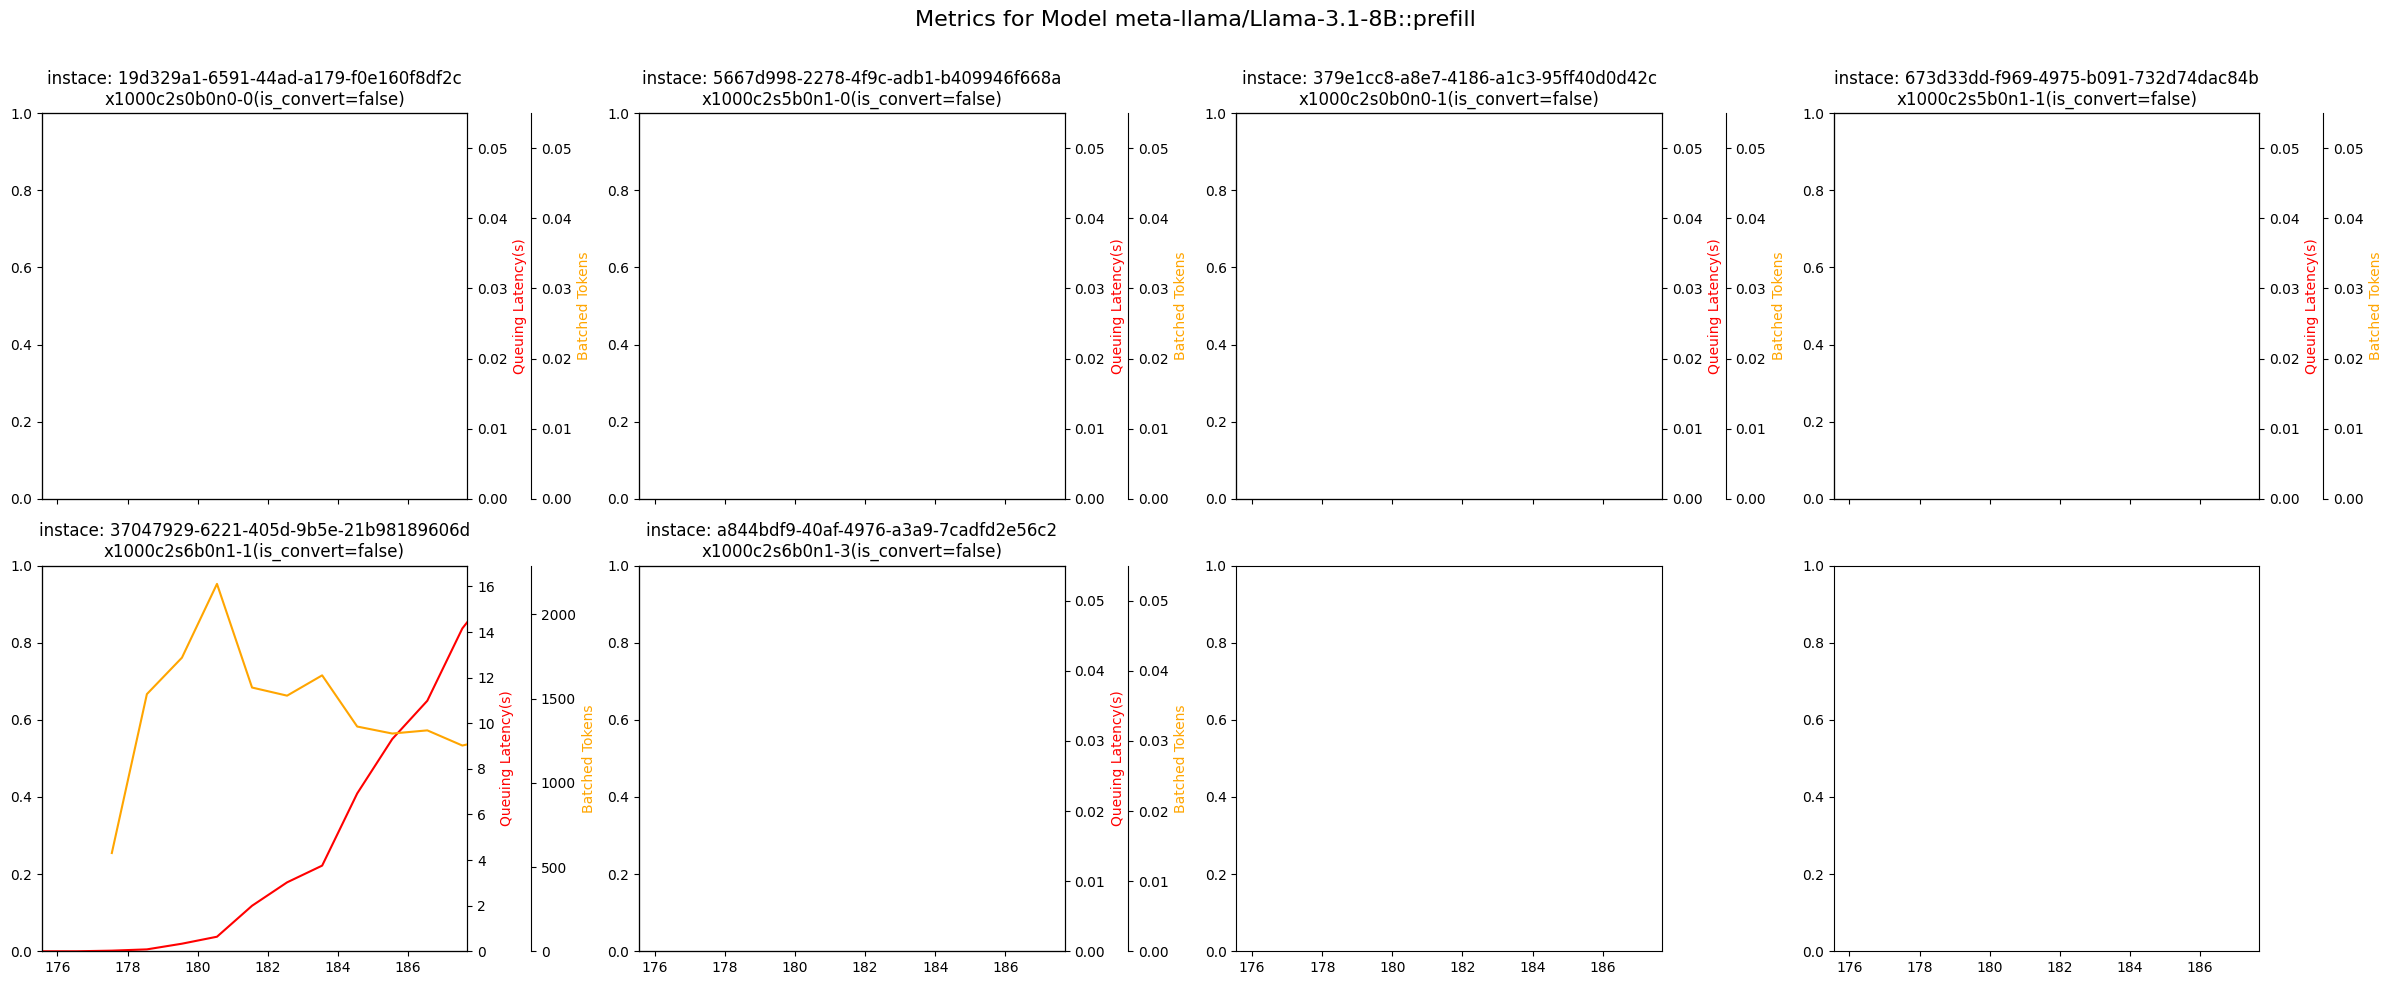

Model meta-llama/Llama-3.1-8B::decode has 1 instances.


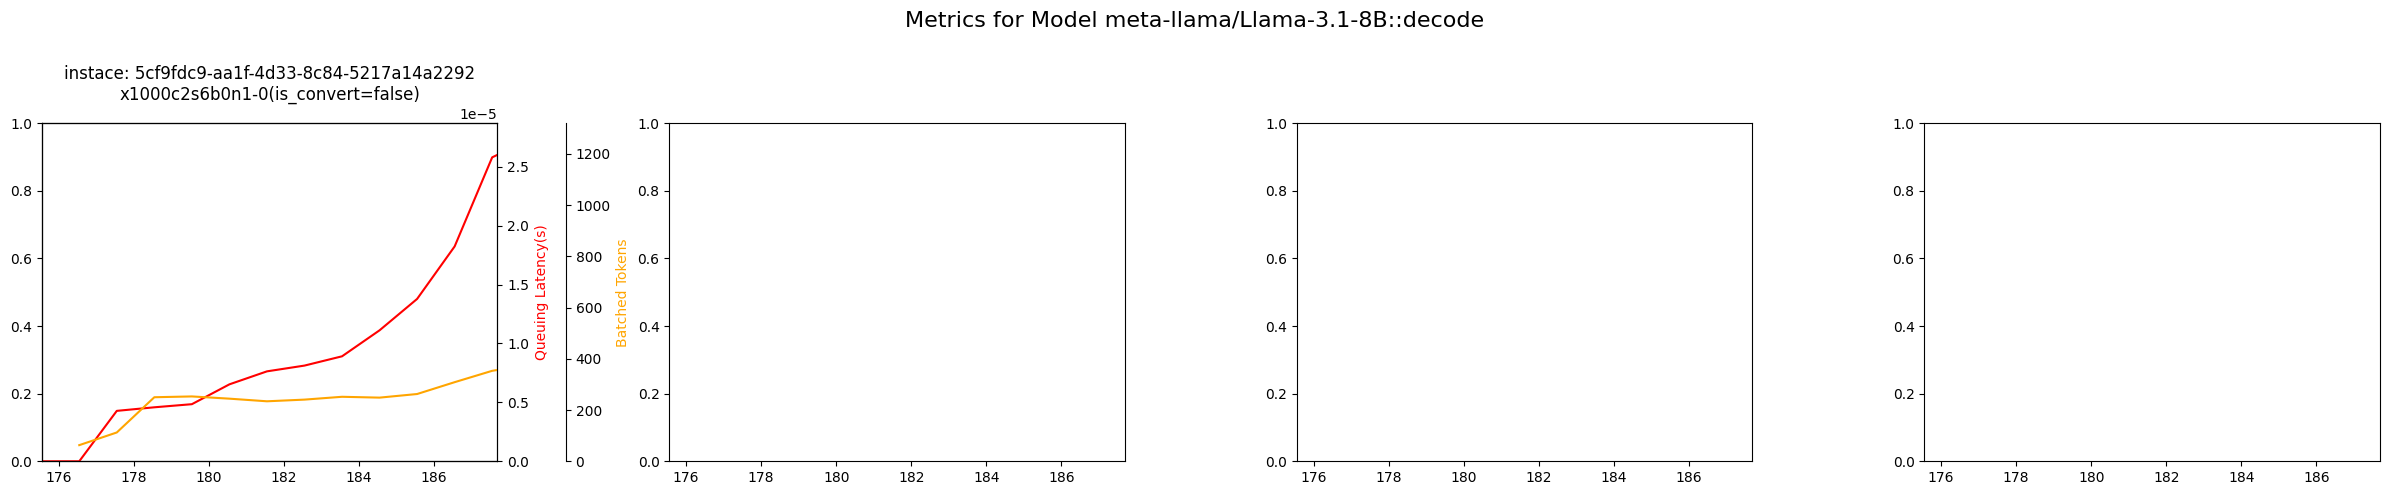

Model meta-llama/Llama-3.1-8B has 1 instances.


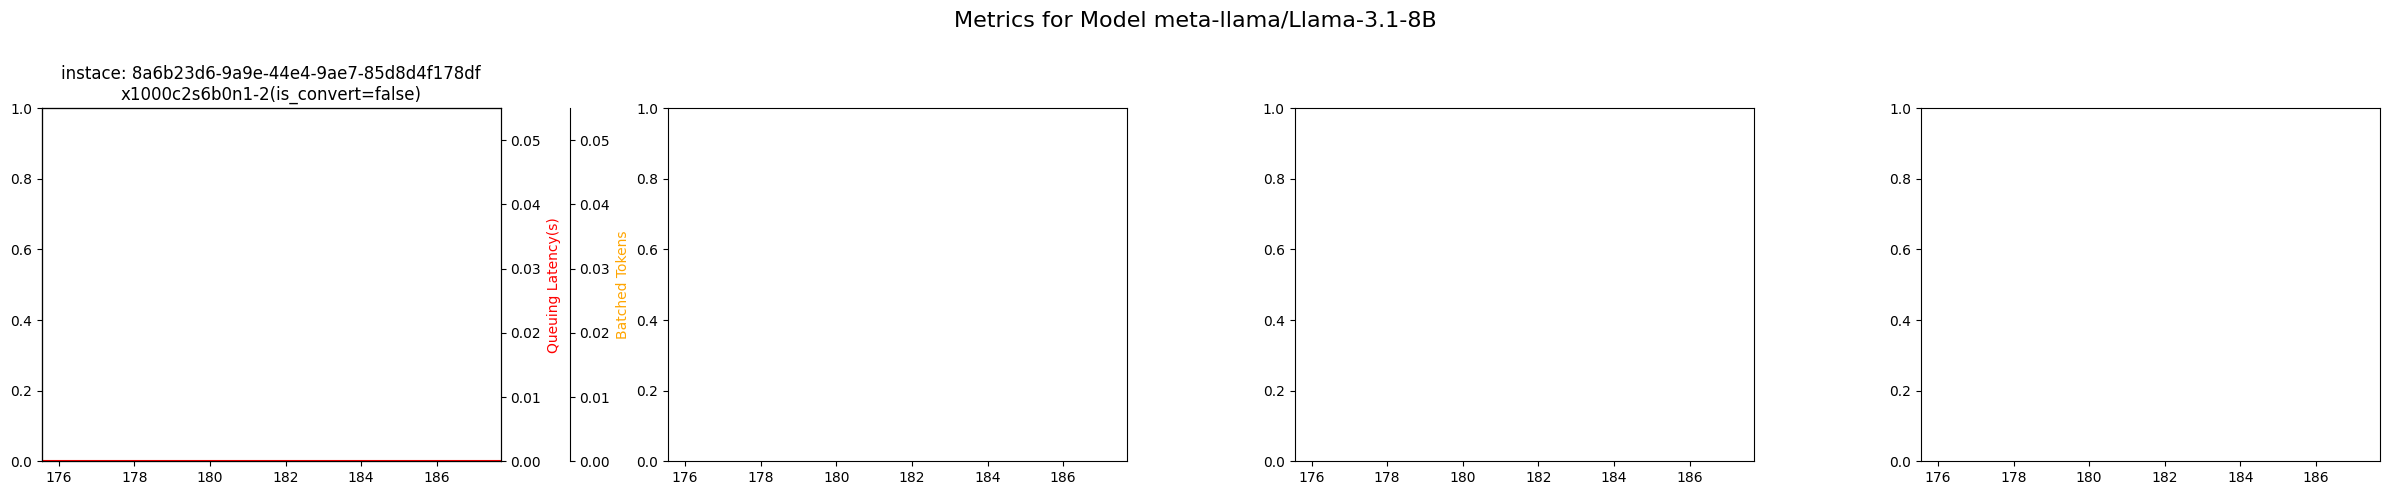

In [52]:

instance_data = report['prom_instance_data']
model_metrics_map = {}
for instance_uuid, metrics in instance_data.items():
    model = metrics['metadata']['model']
    meta = f"{metrics['metadata']['hostname']}-{metrics['metadata']['gpu_uuid']}(is_convert={metrics['metadata']['is_convert']})"
    if model not in model_metrics_map:
        model_metrics_map[model] = {}
    
    if instance_uuid not in model_metrics_map[model]:
        model_metrics_map[model][instance_uuid] = (meta, metrics)

for model, instance_map in model_metrics_map.items():
    n_instances = len(instance_map)
    print(f"Model {model} has {n_instances} instances.")
    # if n_instances == 1:
    #     continue
    nrows = math.ceil(n_instances / 4)
    ncols = 4

    fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 5 * nrows), sharex=True)
    if n_instances == 1:
        axes = [axes]
    elif nrows == 1:
        axes = [axes]
    elif ncols == 1:
        axes = [[ax] for ax in axes]

    for idx, (instance_uuid, (meta, metrics)) in enumerate(instance_map.items()):
        row, col = divmod(idx, 4)
        ax = axes[row][col]

        add_metric_plot(metrics, memory_metric, ax, color="blue", ylabel="KVC Usage")
        ax.set_ylim([0, 1])

        ax2 = ax.twinx()
        add_metric_plot(metrics, queue_metric, ax2, color="red", ylabel="Queuing Latency(s)")
        ax2.set_ylim(bottom=0)

        ax3 = ax.twinx()
        ax3.spines["right"].set_position(("axes", 1.15))
        add_metric_plot(metrics, compute_metric, ax3, color="orange", ylabel="Batched Tokens")
        ax3.set_ylim(bottom=0)

        ax.set_title(f"instace: {instance_uuid}\n{meta}")

    # Hide empty subplots

    plt.suptitle(f"Metrics for Model {model}", fontsize=16)
    plt.xlabel("Time")
    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for suptitle
    plt.show()

# Plot Router Data

In [53]:
import re
from datetime import datetime
def extract_timeout_offsets(router_err_file, router_start_time: float):
    """
    Parse router_err_file for lines containing 'err: timeout'.
    Extract the Go-style timestamp, compute offset from router_start_time,
    and return a list of offsets (float seconds).
    """
    # Matches timestamps like 2025/09/13 13:04:19.701827
    pattern = re.compile(r"^(\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2}\.\d+)")
    results = []

    tz = ZoneInfo("Asia/Singapore")
    with open(router_err_file, "r") as f:
        for line in f:
            if "err: timeout" not in line:
                continue
            match = pattern.match(line)
            if match:
                ts_str = match.group(1)
                ts = datetime.strptime(ts_str, "%Y/%m/%d %H:%M:%S.%f").replace(tzinfo=tz)
                ts_float = ts.timestamp()
                offset = ts_float - router_start_time
                results.append(offset)

    return results

Model meta-llama/Llama-3.1-8B::prefill has 0 timeout errors.


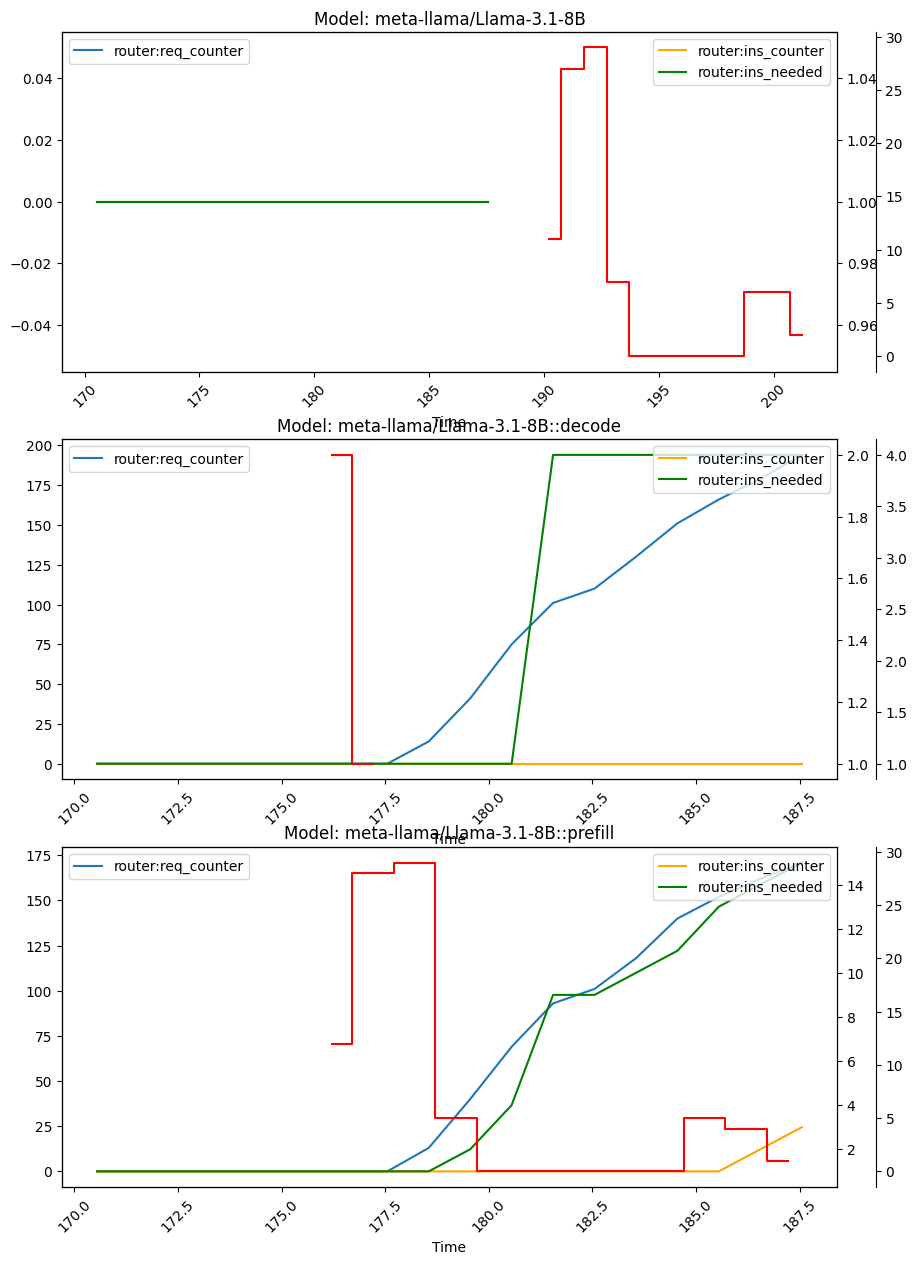

In [54]:
import numpy as np
req_counter = report['prom_data']
prefill_model_name = "meta-llama/Llama-3.1-8B::prefill"
decode_model_name = "meta-llama/Llama-3.1-8B::decode"

router_metrics = req_counter.get("router", {})
num_models = len(router_metrics)
fig, axes = plt.subplots(num_models, 1, figsize=(10, 5 * num_models))
ttft_violate_timestamps = []
tpot_violate_timestamps = []
for request in requests:
    ttft_attain, tbt_attain = request.satisfy_SLO()
    if not ttft_attain:
        ttft_violate_timestamps.append(request.arrival_time - router_start_time)
    if not tbt_attain:
        tpot_violate_timestamps.append(request.arrival_time - router_start_time)

    
for i, (model_name, metrics) in enumerate(router_metrics.items()):
    ax = axes[i] if num_models > 1 else axes
    req_counter_values = metrics.get(req_counter_metric, [])
    req_counter_values = [
        t for t in req_counter_values 
        if float(t[0]) <= router_end_time
    ]
    timestamps = [float(t[0]) for t in req_counter_values]
    timestamp_offsets = [t - router_start_time for t in timestamps]
    ax.plot(
        timestamp_offsets,
        [float(t[1]) for t in req_counter_values],
        label=req_counter_metric
    )
    ax2 = ax.twinx()
    ins_counter_values = metrics.get(ins_counter_metric, [])
    ins_counter_values = [
        t for t in ins_counter_values 
        if float(t[0]) <= router_end_time
    ]
    timestamps = [float(t[0]) for t in ins_counter_values]
    timestamp_offsets = [t - router_start_time for t in timestamps]
    ax2.plot(
        timestamp_offsets,
        [float(t[1]) for t in ins_counter_values],
        label=ins_counter_metric,
        color='orange'
    )
    ins_needed_values = metrics.get(ins_needed_metric, [])
    ins_needed_values = [
        t for t in ins_needed_values 
        if float(t[0]) <= router_end_time
    ]
    timestamps = [float(t[0]) for t in ins_needed_values]
    base_timestamp = min(timestamps)
    timestamp_offsets = [t - router_start_time for t in timestamps]
    ax2.plot(
        timestamp_offsets,
        [float(t[1]) for t in ins_needed_values],
        label=ins_needed_metric,
        color='green'
    )
    draw_violation = True
    if model_name.endswith("::prefill"):
        if ttft_violate_timestamps == []:
            draw_violation = False
            pass
        else:
            if hasattr(ttft_violate_timestamps[0], "timestamp"):
                times_values = [t.timestamp() for t in ttft_violate_timestamps]
            else:
                times_values = ttft_violate_timestamps
            router_err_file = f"{run_log_dir}/router.err"
            timeout_offsets = extract_timeout_offsets(router_err_file, router_start_time)
            print(f"Model {model_name} has {len(timeout_offsets)} timeout errors.")
            times_values += timeout_offsets
            times = np.array(times_values)
    elif model_name.endswith("::decode"):
        if tpot_violate_timestamps == []:
            draw_violation = False
            pass
        else:
            if hasattr(tpot_violate_timestamps[0], "timestamp"):
                times = np.array([t.timestamp() for t in tpot_violate_timestamps])
            else:
                times = np.array(tpot_violate_timestamps)
    try:
        if draw_violation:
            # Window size (in seconds)
            window_size = 1.0  

            # Create bins
            t_min, t_max = times.min(), times.max()
            bins = np.arange(t_min, t_max + window_size, window_size)

            # Count violations in each window
            counts, bin_edges = np.histogram(times, bins=bins)

            # Plot counts vs time
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
            ax3 = ax.twinx()
            ax3.plot(bin_centers, counts, drawstyle="steps-mid", color="r", label="violations per window")
            
            ax3.spines["right"].set_position(("axes", 1.05))  # 15% to the right of ax1
    except:
        print(f"model {model_name}'s violation cannot be plotted")

    
    ax.set_title(f"Model: {model_name}")
    ax.set_xlabel("Time")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper left')
    # ax.set_ylim([500, 520])
    ax2.legend(loc='upper right')
    # ax2.set_xlim([135, 158])
    # ax2.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    # ax2.set_ylim([0.9,2.1])

In [55]:
import re
import glob
import pandas as pd
from datetime import datetime
from zoneinfo import ZoneInfo
import matplotlib.pyplot as plt
import os
from datetime import datetime, timezone, timedelta

# Regex patterns
alloc_sent_pattern = re.compile(
    r"\[(.*?)\] LMCache INFO:.*alloc sent NOW req=(\S+)"
)
alloc_reply_pattern = re.compile(
    r"\[(.*?)\] LMCache INFO:.*alloc got-reply req_id=(\S+)"
)
transfer_done_pattern = re.compile(
    r"\[(.*?)\] LMCache INFO:.*transfer DONE for req_id=(\S+), duration: ([\d\.]+) ms"
)

# Regex for stripping ANSI color codes
ansi_escape = re.compile(r"\x1B\[[0-9;]*[mK]")

records = {}

def parse_timestamp(ts_str):
    # Example: "2025-09-02 22:48:40,649"
    ts = datetime.strptime(ts_str, "%Y-%m-%d %H:%M:%S,%f")
    # Convert to Singapore timezone
    ts = ts.replace(tzinfo=timezone.utc) - timedelta(hours=8)
    # Convert to float seconds offset
    return ts.timestamp() - router_start_time

# Iterate over all worker error logs
for fname in glob.glob(os.path.join(run_log_dir, "worker_*.err")):
    with open(fname, "r") as f:
        for line in f:
            line = ansi_escape.sub("", line)  # remove ANSI escapes

            m1 = alloc_sent_pattern.search(line)
            if m1:
                ts_str, req_id = m1.groups()
                ts = parse_timestamp(ts_str)
                records.setdefault(req_id, {})["alloc_start"] = ts
                continue

            m2 = alloc_reply_pattern.search(line)
            if m2:
                ts_str, req_id = m2.groups()
                ts = parse_timestamp(ts_str)
                records.setdefault(req_id, {})["alloc_reply"] = ts
                continue

            m3 = transfer_done_pattern.search(line)
            if m3:
                ts_str, req_id, duration = m3.groups()
                ts = parse_timestamp(ts_str)
                records.setdefault(req_id, {})["transfer_done"] = ts
                records[req_id]["transfer_latency"] = float(duration) / 1000.0  # ms -> s
                continue

# Convert to DataFrame
rows = []
for req_id, v in records.items():
    if "alloc_start" in v and "alloc_reply" in v:
        alloc_latency = v["alloc_reply"] - v["alloc_start"]
        if alloc_latency >= 1:
            print(f"Request {req_id} has high alloc latency: {alloc_latency:.3f}s")
    else:
        alloc_latency = None
    rows.append({
        "req_id": req_id,
        "alloc_start": v.get("alloc_start"),
        "alloc_latency": alloc_latency,
        "transfer_done": v.get("transfer_done"),
        "transfer_latency": v.get("transfer_latency"),
    })

df = pd.DataFrame(rows).sort_values("alloc_start")

# Plot

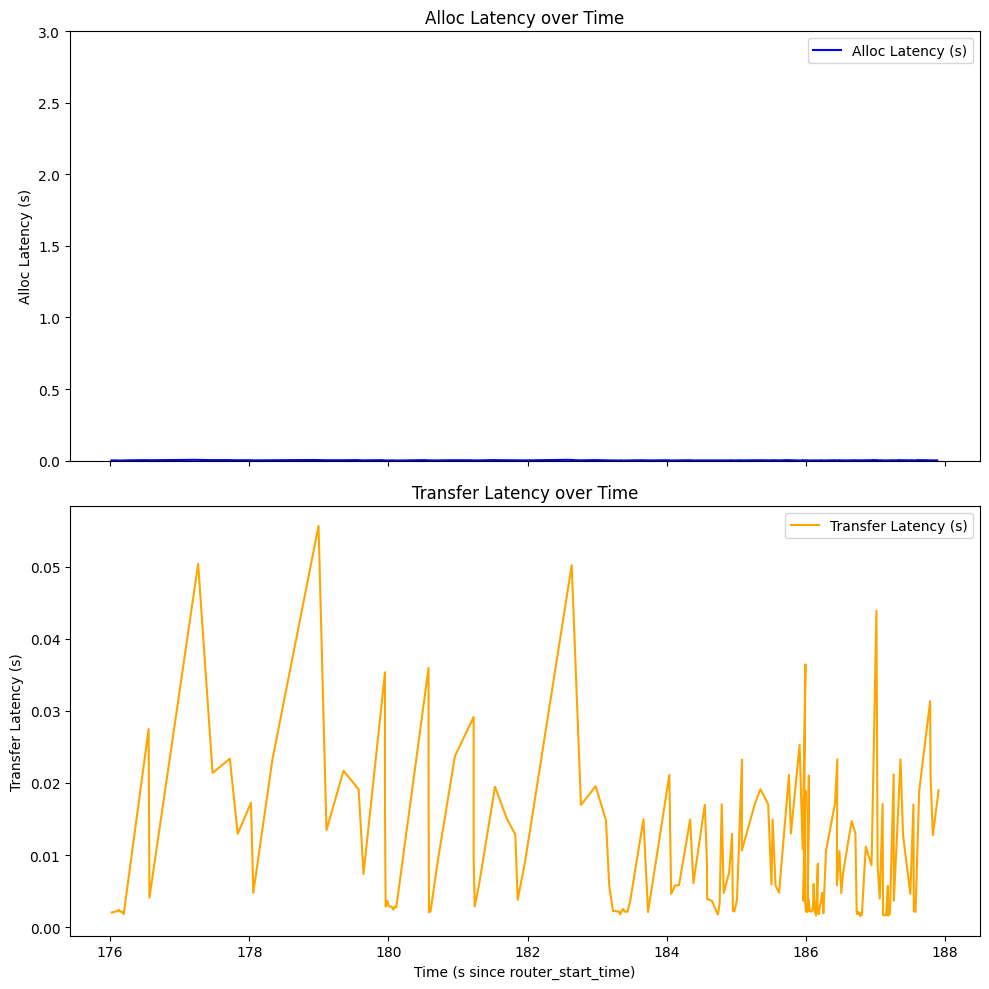

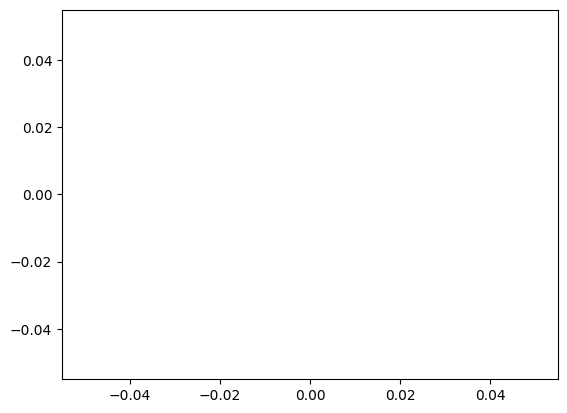

In [56]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# First subplot: Alloc latency
axes[0].plot(df["alloc_start"], df["alloc_latency"], label="Alloc Latency (s)", color="blue")
axes[0].set_ylabel("Alloc Latency (s)")
axes[0].set_title("Alloc Latency over Time")
axes[0].set_ylim(0,3)
axes[0].legend()

# Second subplot: Transfer latency
axes[1].plot(df["transfer_done"], df["transfer_latency"], label="Transfer Latency (s)", color="orange")
axes[1].set_xlabel("Time (s since router_start_time)")
axes[1].set_ylabel("Transfer Latency (s)")
axes[1].set_title("Transfer Latency over Time")
axes[1].legend()

plt.tight_layout()
plt.show()
arrivals = []
ttfts = []
for request in requests:
    if request.waiting_latency == 0:
        arrival = request.arrival_time - router_start_time
        ttft = request.ttft
        arrivals.append(arrival)
        ttfts.append(ttft)

plt.plot(arrivals, ttfts)

In [57]:
violated_reqs = []
pd_same_node_count = 0
for request in requests:
    if request.arrival_time - router_start_time >= 500 and request.arrival_time - router_start_time <= 525:
        ttft_attain, tbt_attain = request.satisfy_SLO()
        if not ttft_attain:
            violated_reqs.append(request)
            ts = request.arrival_time - router_start_time
            print(f"{ts}, {request.id}: length: {request.prompt_tokens}, {request.ttft}, locality: {request.pd_same_node}")
            if request.pd_same_node:
                pd_same_node_count += 1

print(f"Total violated requests: {len(violated_reqs)}, pd_same_node: {pd_same_node_count}")

Total violated requests: 0, pd_same_node: 0


# Coldstart Values

In [58]:

router_data = report['prom_data']['router']
for model_name in router_data.keys():
    coldstart_metrics = router_data[model_name][coldstart_metric]
    coldstart_values = [t[1] for t in coldstart_metrics]
    coldstart_set = set(coldstart_values)
    print(f"Model: {model_name}, coldstart values: {coldstart_set}")

Model: meta-llama/Llama-3.1-8B, coldstart values: {'5.560538657'}
Model: meta-llama/Llama-3.1-8B::decode, coldstart values: {'9.562324085'}
Model: meta-llama/Llama-3.1-8B::prefill, coldstart values: {'7.561142496', '7.562328657', '8.558953819', '7.561125955'}


In [59]:
# Regex: matches coldstart_<uuid>.json and captures the UUID part
coldstart_data = {}
pattern = re.compile(r"^coldstart_([a-fA-F0-9\-]+)\.json$")
for root, _, files in os.walk(run_log_dir):
        for fname in files:
            match = pattern.match(fname)
            if match:
                uuid = match.group(1)  # Extract captured UUID
                full_path = os.path.join(root, fname)
                with open(full_path) as f:
                    coldstart_data[uuid] = json.load(f)

print(f"collected coldstart profiles for: {coldstart_data.keys()}")
# analyze the uuid with longgest coldstart
uuid = '675e8b04-d79e-4212-baec-91d55453783d'
if uuid not in coldstart_data:
    pass
else:
    # plot the gpu memory usage:
    events = coldstart_data[uuid]['events']
    # print(coldstart_data[uuid]['children'][0]['events'])
    for k, v in coldstart_data[uuid]['children'][1]['events'].items():
        events[k] = v

    
    times = []
    gpu_memory_usage_map = {}
    for name, event in events.items():
        time = event['time']
        gpu_usages = event['gpu_usage']
        for gpu_id in gpu_usages:
            gpu_usage = gpu_usages[gpu_id]['used_MB'] / 1024
            if gpu_id not in gpu_memory_usage_map:
                gpu_memory_usage_map[gpu_id] = []
            gpu_memory_usage_map[gpu_id].append(gpu_usage)

        times.append(time)

    plt.figure()
    for gpu_id, gpu_memory_usage in gpu_memory_usage_map.items():
        times_sorted, gpu_memory_usage_sorted = zip(*sorted(zip(times, gpu_memory_usage)))
        plt.plot(times_sorted, gpu_memory_usage_sorted, label=f"GPU={gpu_id}", marker='.')

    plt.legend()

                

collected coldstart profiles for: dict_keys([])


# Router Counters

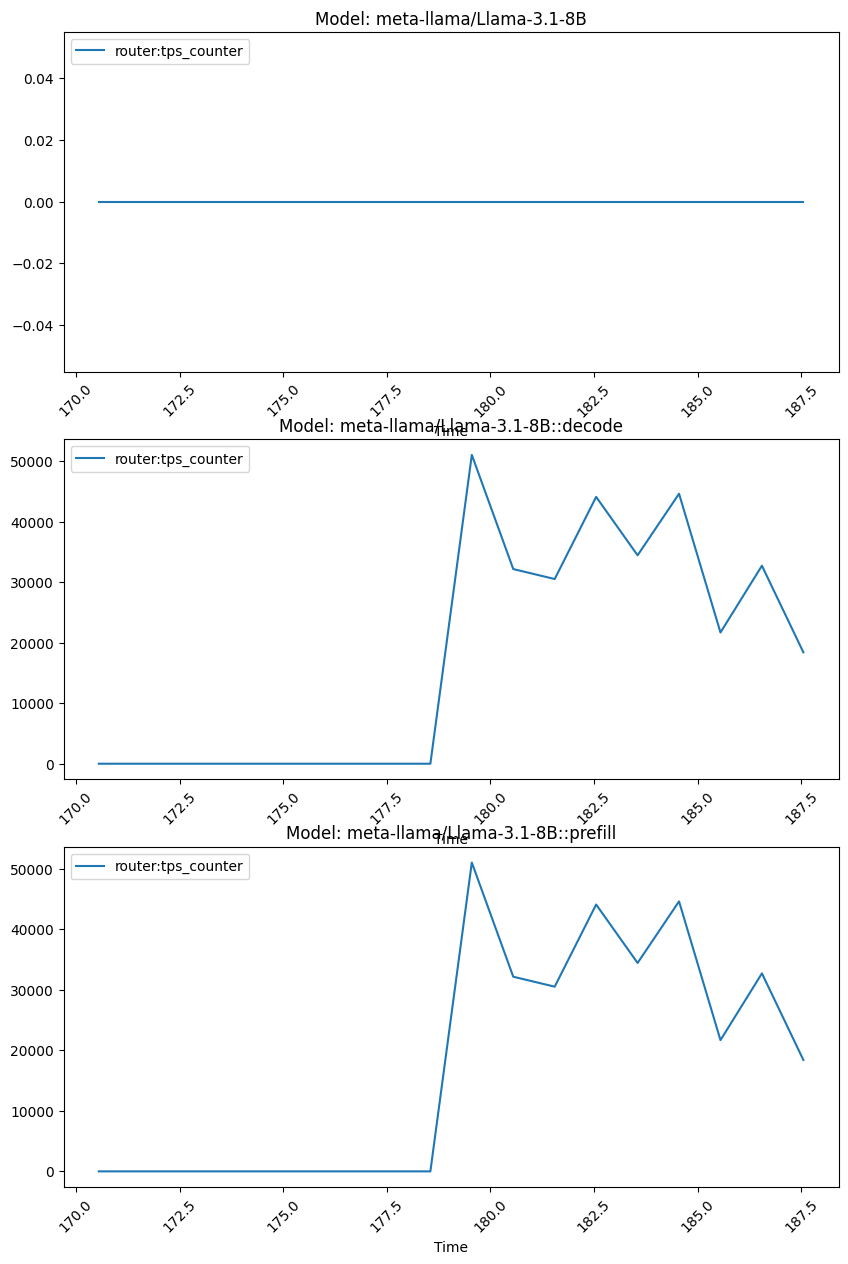

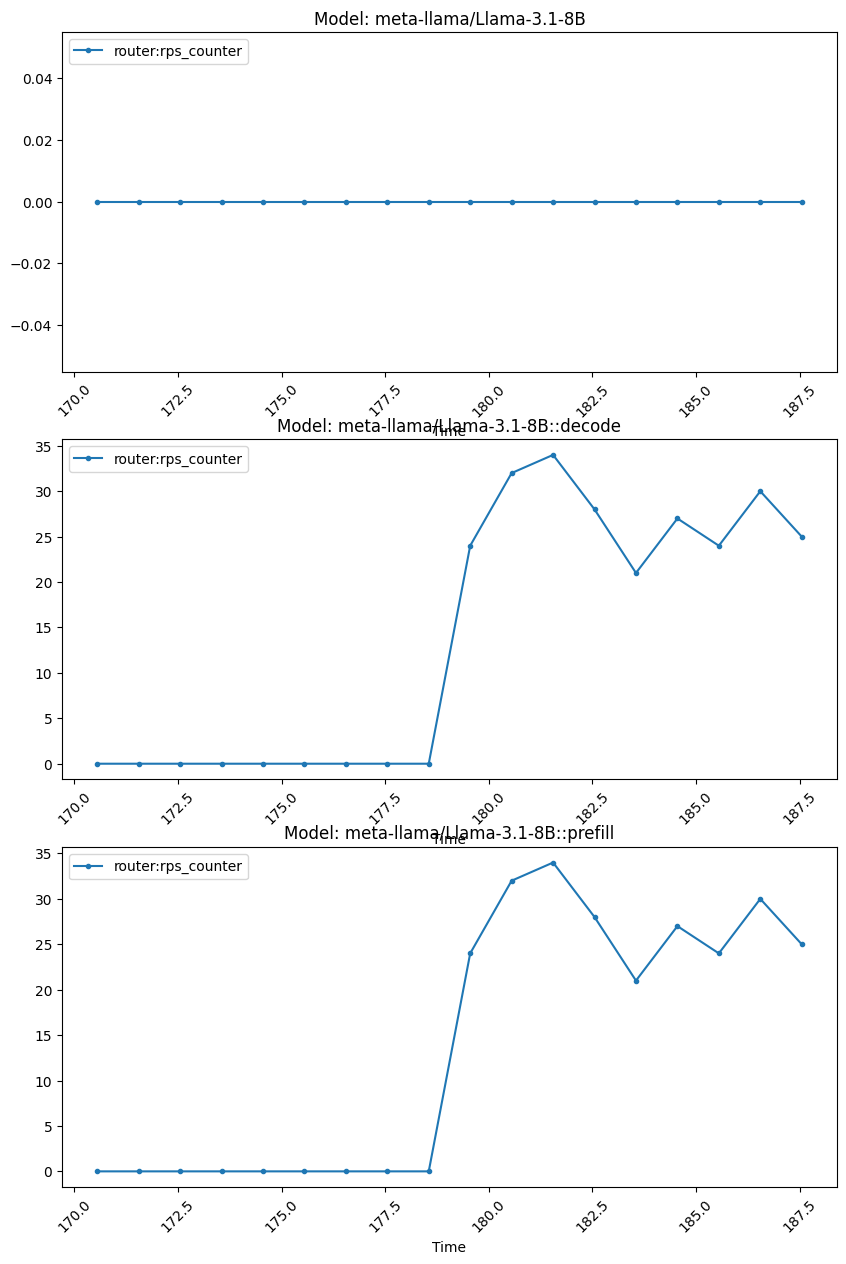

In [60]:

router_metrics = req_counter.get("router", {})
num_models = len(router_metrics)
fig, axes = plt.subplots(num_models, 1, figsize=(10, 5 * num_models))
metric_name = tps_counter_metric
for i, (model_name, metrics) in enumerate(router_metrics.items()):
    ax = axes[i] if num_models > 1 else axes
    tok_counter_values = metrics.get(metric_name, [])
    tok_counter_values = [
        t for t in tok_counter_values 
        if float(t[0]) <= router_end_time
    ]
    timestamps = [float(t[0]) for t in tok_counter_values]
    timestamp_offsets = [t - router_start_time for t in timestamps]
    ax.plot(
        timestamp_offsets,
        [float(t[1]) for t in tok_counter_values],
        label=metric_name
    )
    ax.set_title(f"Model: {model_name}")
    ax.set_xlabel("Time")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper left')

fig, axes = plt.subplots(num_models, 1, figsize=(10, 5 * num_models))
metric_name = rps_counter_metric
for i, (model_name, metrics) in enumerate(router_metrics.items()):
    ax = axes[i] if num_models > 1 else axes
    tok_counter_values = metrics.get(metric_name, [])
    tok_counter_values = [
        t for t in tok_counter_values 
        if float(t[0]) <= router_end_time
    ]
    timestamps = [float(t[0]) for t in tok_counter_values]
    timestamp_offsets = [t - router_start_time for t in timestamps]
    ax.plot(
        timestamp_offsets,
        [float(t[1]) for t in tok_counter_values],
        label=metric_name,
        marker='.',
    )
    ax.set_title(f"Model: {model_name}")
    ax.set_xlabel("Time")
    # ax.set_xlim([130, 145])
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper left')


Text(0, 0.5, 'Prompt tokens')

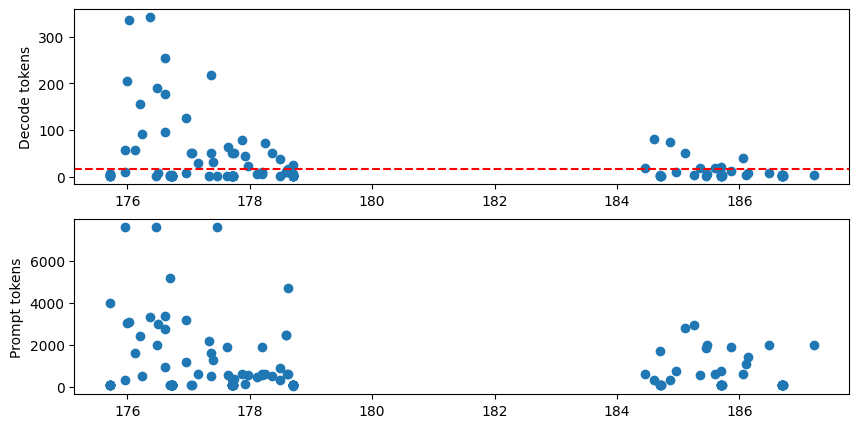

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Convert arrival times to seconds (assuming arrival_time is in seconds already)
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
arrival_times = np.array([req.arrival_time - router_start_time for req in requests])
input_tokens = np.array([req.prompt_tokens for req in requests])
output_tokens = np.array([req.decode_tokens for req in requests])
axes[0].plot(arrival_times, output_tokens, 'o')
# axes[0].set_xlim(519, 524)
# axes[0].set_ylim(0, 100)
axes[0].axhline(y=16, color='r', linestyle='--')
axes[0].set_ylabel("Decode tokens")
axes[1].plot(arrival_times, input_tokens, 'o')
# axes[1].set_xlim(519, 524)
axes[1].set_ylabel("Prompt tokens")


In [62]:
router_metrics = req_counter.get("router", {})
num_models = len(router_metrics)
import matplotlib.pyplot as plt
from collections import defaultdict
with open("Qwen_2.5_32B.json", 'r') as f:
    qwen_profile = json.load(f)

metric_name = tps_counter_map_metric

for model_name, metrics in router_metrics.items():
    if not model_name.endswith("::decode"):
        continue

    tok_counter_values = metrics.get(metric_name, {})
    if not tok_counter_values:
        continue

    # Group request_types by input length
    grouped = defaultdict(dict)
    per_type_instances = defaultdict(dict)
    for request_type, values in tok_counter_values.items():
        # request_type looks like "input1024_output128"
        parts = request_type.split("_")
        input_len = parts[0].replace("input", "")
        output_len = parts[1].replace("output", "")
        grouped[input_len][output_len] = values

        per_type_target = qwen_profile['capacity_map'].get(request_type, None)
        instance_values = [float(v[1]) / per_type_target for v in values]
        per_type_instance = [(v[0], inst) for v, inst in zip(values, instance_values)]
        per_type_instances[input_len][output_len] = per_type_instance

    num_inputs = len(grouped)
    fig, axes = plt.subplots(1, num_inputs, figsize=(5*num_inputs, 5), sharex=True)
    if num_inputs == 1:
        axes = [axes]

    for ax, (input_len, outputs) in zip(axes, grouped.items()):
        for output_len, values in outputs.items():
            # Filter values within time range
            filtered = [t for t in values if float(t[0]) <= router_end_time]
            timestamps = [float(t[0]) for t in filtered]
            timestamp_offsets = [t - router_start_time for t in timestamps]

            ax.plot(
                timestamp_offsets,
                [float(t[1]) for t in filtered],
                label=f"output {output_len}"
            )

        ax.set_title(f"input {input_len}")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Token Rate(tok/s)")
        ax.tick_params(axis='x', rotation=45)
        ax.legend(loc='upper left')

    fig.suptitle(f"Decode model: {model_name}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # plot the per type instance
    fig, axes = plt.subplots(1, num_inputs, figsize=(5*num_inputs, 5), sharex=True)
    for ax, (input_len, outputs) in zip(axes, per_type_instances.items()):
        for output_len, values in outputs.items():
            # Filter values within time range
            filtered = [t for t in values if float(t[0]) <= router_end_time]
            timestamps = [float(t[0]) for t in filtered]
            timestamp_offsets = [t - router_start_time for t in timestamps]

            ax.plot(
                timestamp_offsets,
                [float(t[1]) for t in filtered],
                label=f"output {output_len}"
            )

        ax.set_title(f"input {input_len}")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Instance(#)")
        ax.tick_params(axis='x', rotation=45)
        ax.legend(loc='upper left')

    fig.suptitle(f"Decode model: {model_name}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

# SLO Attainment Rate

In [63]:
from datetime import datetime, timedelta
import pytz
import re

def count_requests_within_one_minute(run_log_dir):
    router_file_path = f"{run_log_dir}/router.err"
    first_request_arrival_time = None
    sg_tz = pytz.timezone("Asia/Singapore")
    
    # Regex to extract timestamp
    timestamp_pattern = re.compile(r"(\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2}\.\d+).*arrived!")
    
    with open(router_file_path, "r") as f:
        lines = f.readlines()
    
    # Find first arrival
    for line in lines:
        match = timestamp_pattern.search(line)
        if match:
            first_request_arrival_time = datetime.strptime(match.group(1), "%Y/%m/%d %H:%M:%S.%f")
            first_request_arrival_time = sg_tz.localize(first_request_arrival_time)
            break
    
    if first_request_arrival_time is None:
        return 0, None  # no matching lines found
    
    # Calculate cutoff time (+1 minute)
    cutoff_time = first_request_arrival_time + timedelta(minutes=1)
    
    # Count lines within the 1-minute window
    count = 0
    for line in lines:
        match = timestamp_pattern.search(line)
        if match:
            line_time = datetime.strptime(match.group(1), "%Y/%m/%d %H:%M:%S.%f")
            line_time = sg_tz.localize(line_time)
            if first_request_arrival_time <= line_time < cutoff_time:
                count += 1
    
    # Convert cutoff timestamp to float (seconds since epoch)
    cutoff_timestamp_float = cutoff_time.timestamp()
    
    return count, cutoff_timestamp_float

In [64]:
filtered_out_count, cutoff_time = count_requests_within_one_minute(run_log_dir)
print(f"Within the first minute, {filtered_out_count} requests arrived.")

ttft_attain_count = 0
tbt_attain_count = 0
total_attain_count = 0
valid_requests = [req for req in requests if req.arrival_time >= cutoff_time]
valid_total_request_count = total_request_count - filtered_out_count
print(f"After discarding requests in the first minute, {valid_total_request_count} requests remain.")

tpot_violate_reqs = []
for request in valid_requests:
    ttft_attain, tbt_attain = request.satisfy_SLO()
    if ttft_attain:
        ttft_attain_count += 1
    
    if tbt_attain:
        tbt_attain_count += 1
    else:
        tpot_violate_reqs.append(request)
    
    if ttft_attain and tbt_attain:
        total_attain_count += 1

ttft_attain_rate = ttft_attain_count / valid_total_request_count if valid_total_request_count > 0 else 0
tbt_attain_rate = tbt_attain_count / valid_total_request_count if valid_total_request_count > 0 else 0
total_attain_rate = total_attain_count / valid_total_request_count if valid_total_request_count > 0 else 0

print(f"Among {valid_total_request_count} requests (after discarding first minute), "
      f"{ttft_attain_count} attain TTFT, {tbt_attain_count} attain TBT, {total_attain_count} attain total")
print(f"total attain rate: {total_attain_rate*100:.1f}%, "
      f"TTFT attain rate: {ttft_attain_rate*100:.1f}%, "
      f"TBT attain rate: {tbt_attain_rate*100:.1f}%")

skip_prefill_count = 0
ttft_attain_count = 0
tbt_attain_count = 0
total_attain_count = 0
violated_prompt_length = []
attain_prompt_length = []
for request in valid_requests:
    if request.waiting_latency != 0:
        continue
    skip_prefill_count += 1
    ttft_attain, tbt_attain = request.satisfy_SLO()
    if ttft_attain:
        ttft_attain_count += 1
        attain_prompt_length.append(request.prompt_tokens)
    else:
        print(f"request prompt length: {request.prompt_tokens}, ttft: {request.ttft}, queueing: {request.queueing_latency}")
        violated_prompt_length.append(request.prompt_tokens)
    
    if tbt_attain:
        tbt_attain_count += 1
    else:
        tpot_violate_reqs.append(request)
    
    if ttft_attain and tbt_attain:
        total_attain_count += 1

print(f"Among {skip_prefill_count} requests (after discarding first minute), "
      f"{ttft_attain_count} attain TTFT, {tbt_attain_count} attain TBT, {total_attain_count} attain total")

print(f"avg prefill length for violated reqs: {np.mean(violated_prompt_length)}, avg prefill length for attain reqs: {np.mean(attain_prompt_length)}")




Within the first minute, 329 requests arrived.
After discarding requests in the first minute, 2225 requests remain.
Among 2225 requests (after discarding first minute), 0 attain TTFT, 0 attain TBT, 0 attain total
total attain rate: 0.0%, TTFT attain rate: 0.0%, TBT attain rate: 0.0%
Among 0 requests (after discarding first minute), 0 attain TTFT, 0 attain TBT, 0 attain total
avg prefill length for violated reqs: nan, avg prefill length for attain reqs: nan


Total TBT violated requests: 0
Among TBT violated requests, 0 have zero waiting latency


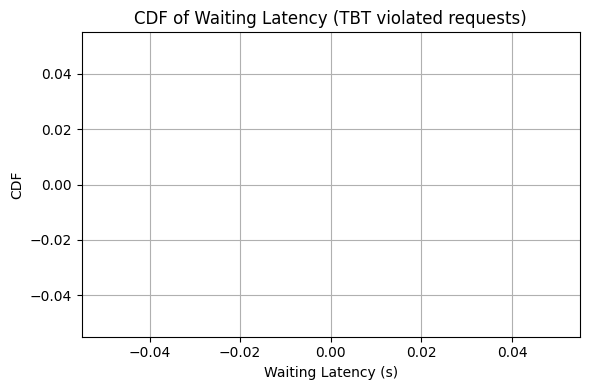

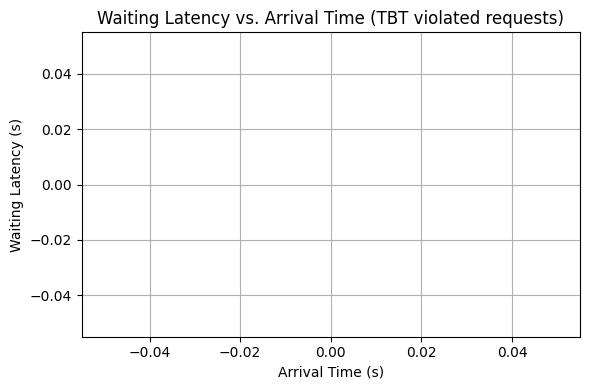

In [65]:
print(f"Total TBT violated requests: {len(tpot_violate_reqs)}")
waiting_latencys = [req.waiting_latency for req in tpot_violate_reqs]
import matplotlib.pyplot as plt
import numpy as np

# Extract
arrival_times = [req.arrival_time for req in tpot_violate_reqs]
waiting_latencys = [req.waiting_latency for req in tpot_violate_reqs]
zero_waiting_count = sum(1 for lat in waiting_latencys if lat == 0)
print(f"Among TBT violated requests, {zero_waiting_count} have zero waiting latency")

# 1. CDF of waiting latency
sorted_lat = np.sort(waiting_latencys)
cdf = np.arange(1, len(sorted_lat)+1) / len(sorted_lat)

plt.figure(figsize=(6, 4))
plt.plot(sorted_lat, cdf, marker='.', linestyle='-')
plt.xlabel("Waiting Latency (s)")
plt.ylabel("CDF")
plt.title("CDF of Waiting Latency (TBT violated requests)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Waiting latency vs arrival time
plt.figure(figsize=(6, 4))
plt.scatter(arrival_times, waiting_latencys, alpha=0.6, s=10)
plt.xlabel("Arrival Time (s)")
plt.ylabel("Waiting Latency (s)")
plt.title("Waiting Latency vs. Arrival Time (TBT violated requests)")
plt.grid(True)
plt.tight_layout()
plt.show()



# CDFs

In [66]:
import numpy as np
import matplotlib.pyplot as plt
def plot_cdf(data, ax=None, label=None, **kwargs):
    """
    Plot the CDF of a 1D array on the given matplotlib Axes.

    Parameters:
    - data: array-like, the input values.
    - ax: matplotlib.axes.Axes, optional. If None, a new figure and axes will be created.
    - label: str, optional label for the CDF curve.
    - **kwargs: other keyword arguments passed to ax.plot()

    Returns:
    - ax: The matplotlib Axes object with the plot.
    """
    data = np.asarray(data)
    data_sorted = np.sort(data)
    cdf = np.linspace(0, 1, len(data_sorted), endpoint=False)

    if ax is None:
        fig, ax = plt.subplots()

    ax.plot(data_sorted, cdf, label=label, **kwargs)
    ax.set_ylabel("CDF")
    ax.set_xlabel("Value")
    if label:
        ax.legend()

    return ax

## E2E Latency

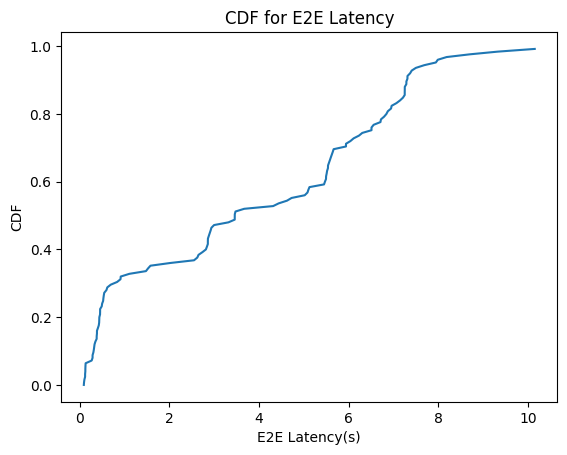

max e2e latency: 10.2s


In [67]:
e2e_latencys = []
ttfts = []
tpots = []
waiting_latencys = []
for request in requests:
    e2e = request.ttft + request.waiting_latency + request.decode_latency
    ttft = request.ttft
    tpot = request.decode_latency / request.decode_tokens
    waiting_latency = request.waiting_latency
    e2e_latencys.append(e2e) 
    ttfts.append(ttft)
    tpots.append(tpot)
    waiting_latencys.append(waiting_latency)

fig, ax = plt.subplots()
ax = plot_cdf(e2e_latencys, ax)
ax.set_xlabel("E2E Latency(s)")
ax.set_title(f"CDF for E2E Latency")
plt.show()
print(f"max e2e latency: {max(e2e_latencys):.1f}s")



## TTFT Latency

Mean ttft for same node: 3.394979577545726, 109 requests
Mean ttft for cross node: 0.25276970863342285, 16 requests


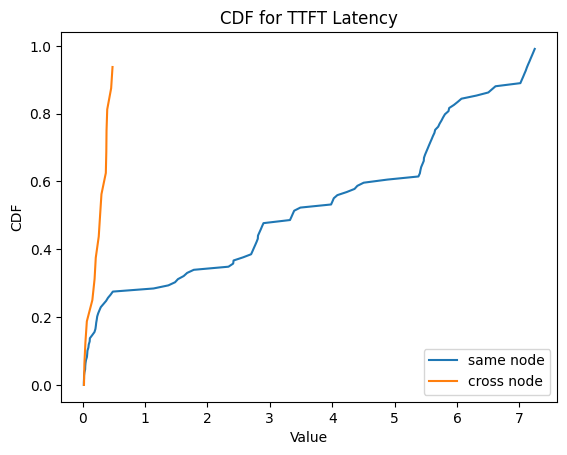

Text(0, 0.5, 'TTFT(s)')

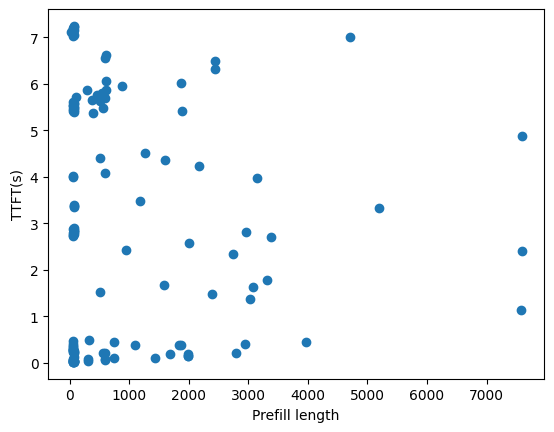

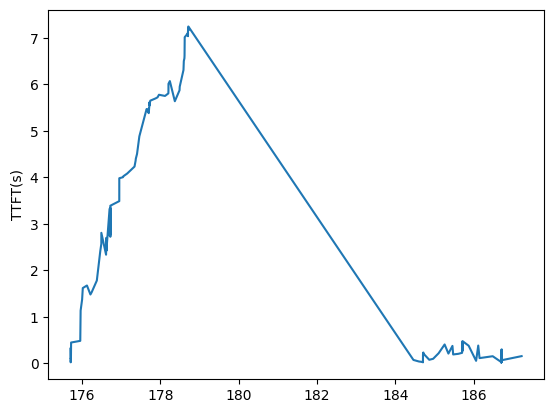

In [68]:
ttft_same_node = []
ttft_cross_node = []
for request in requests:
    if request.pd_same_node == 0:
        ttft_cross_node.append(request.ttft)
    else:
        ttft_same_node.append(request.ttft)
print(f"Mean ttft for same node: {np.mean(ttft_same_node)}, {len(ttft_same_node)} requests")
print(f"Mean ttft for cross node: {np.mean(ttft_cross_node)}, {len(ttft_cross_node)} requests")
fig, ax = plt.subplots()
ax = plot_cdf(ttft_same_node, ax, label=f"same node")
ax = plot_cdf(ttft_cross_node, ax ,label=f"cross node")
ax.legend()
ax.set_title(f"CDF for TTFT Latency")
plt.show()

request_lengths = []
ttfts = []
request_arrival_time = []
for request in requests:
    request_lengths.append(request.prompt_tokens)
    ttfts.append(request.ttft)
    request_arrival_time.append(request.arrival_time - router_start_time)

plt.figure()
plt.scatter(request_lengths, ttfts)
plt.xlabel(f"Prefill length")
plt.ylabel(f"TTFT(s)")

plt.figure()
# plt.xlim(145, 155)
# Assuming request_arrival_time and ttfts are both lists of the same length
sorted_pairs = sorted(zip(request_arrival_time, ttfts))

# Unzip them back into two separate lists
request_arrival_time_sorted, ttfts_sorted = zip(*sorted_pairs)
plt.plot(request_arrival_time_sorted, ttfts_sorted)
plt.ylabel(f"TTFT(s)")


In [69]:

queueing_disagg = []
queueing_agg = []
for request in requests:
    if request.waiting_latency == 0:
        queueing_agg.append(request.queueing_latency)
    else:
        queueing_disagg.append(request.queueing_latency)
print(f"Mean queueing latency for disagg: {np.mean(queueing_disagg)}")
print(f"Mean queueing latency for agg: {np.mean(queueing_agg)}")

Mean queueing latency for disagg: 2.9008073348999024
Mean queueing latency for agg: nan


## Transimission Latency

On same node: 204.3ms
On same node: 203.5ms
On same node: 22.2ms
On same node: 86.7ms
On same node: 203.7ms
On same node: 202.6ms
On same node: 81.7ms
On same node: 132.7ms
On same node: 26.0ms
On same node: 44.4ms
On same node: 137.7ms
On same node: 65.4ms
On same node: 26.7ms
On same node: 70.1ms
On same node: 26.2ms
On same node: 26.5ms
On same node: 24.1ms
On same node: 23.8ms
On same node: 25.0ms
On same node: 21.4ms
On same node: 23.6ms
On same node: 20.7ms
On same node: 106.1ms
On same node: 84.1ms
On same node: 68.5ms
On same node: 22.6ms
On same node: 39.5ms
On same node: 59.7ms
On same node: 64.7ms
On same node: 37.1ms
On same node: 54.1ms
On same node: 32.1ms
On same node: 62.4ms
On same node: 22.4ms
On same node: 40.6ms
On same node: 135.8ms
On same node: 28.7ms
On same node: 49.2ms
On same node: 54.8ms
On same node: 23.8ms
On same node: 23.2ms
On same node: 22.6ms
On same node: 26.8ms
On same node: 23.8ms
On same node: 23.1ms
On same node: 22.3ms
On same node: 21.7ms
On sa

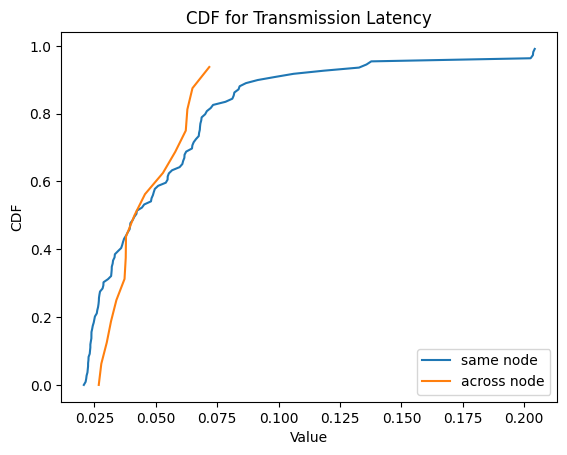

In [70]:
transmission_same_node = []
transmission_across_node = []
for request in requests:
    if request.pd_same_node == 1:
        print(f"On same node: {request.waiting_latency*1000:.1f}ms")
        transmission_same_node.append(request.waiting_latency)
    else:
        print(f"Across node: {request.waiting_latency*1000:.1f}ms")
        transmission_across_node.append(request.waiting_latency)
print(f"Mean transmission for disagg: {np.mean(transmission_same_node)}")
fig, ax = plt.subplots()
ax = plot_cdf(transmission_same_node, ax, label=f"same node")
ax = plot_cdf(transmission_across_node, ax ,label=f"across node")
ax.legend()
ax.set_title(f"CDF for Transmission Latency")
plt.show()

## Decode TTFT

Mean ttft for disagg: 0.04390632438659668, number of requests: 125
Mean ttft for agg: nan, number of requests: 0


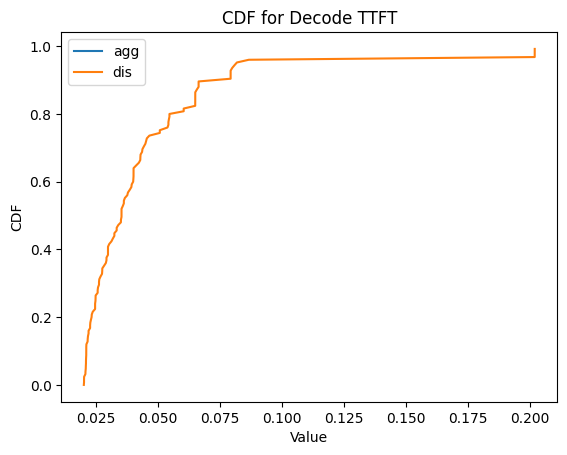

In [71]:

decode_ttft_disagg = []
decode_ttft_agg = []
for request in requests:
    if request.waiting_latency == 0:
        decode_ttft_agg.append(request.ttft)
        if request.ttft > 2.5:
            print(f"Large ttft: {request.ttft}, request prompt length: {request.prompt_tokens}, decode length: {request.decode_tokens}")
    else:
        decode_ttft_disagg.append(request.decode_ttft)
print(f"Mean ttft for disagg: {np.mean(decode_ttft_disagg)}, number of requests: {len(decode_ttft_disagg)}")
print(f"Mean ttft for agg: {np.mean(decode_ttft_agg)}, number of requests: {len(decode_ttft_agg)}")
fig, ax = plt.subplots()
ax = plot_cdf(decode_ttft_agg, ax, label=f"agg")
ax = plot_cdf(decode_ttft_disagg, ax ,label=f"dis")
ax.legend()
ax.set_title(f"CDF for Decode TTFT")
plt.show()

Text(0.5, 1.0, 'Decode TTFT vs. Arrival Time (Stable Requests)')

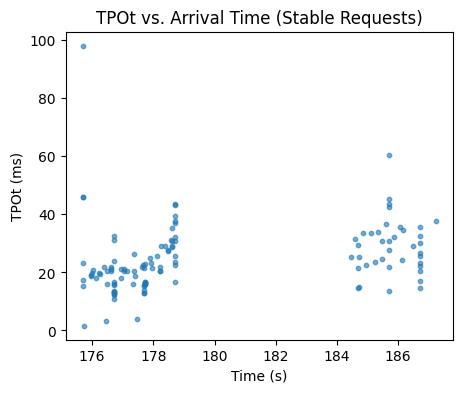

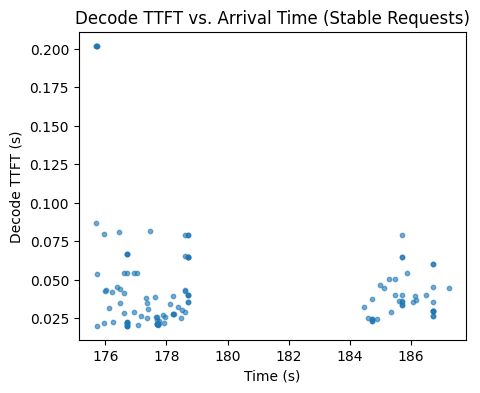

In [72]:
request_timestamps = []
request_tpots = []
request_decode_ttfts = []
for request in requests:
    if request.waiting_latency == 0:
        continue
    tpot = request.decode_latency / request.decode_tokens
    request_tpots.append(tpot*1000)
    request_decode_ttfts.append(request.decode_ttft)
    request_timestamps.append(request.arrival_time - router_start_time)

fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(request_timestamps, request_tpots, alpha=0.6, s=10)
ax.set_xlabel("Time (s)")
ax.set_ylabel("TPOt (ms)")
ax.set_title("TPOt vs. Arrival Time (Stable Requests)")

fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(request_timestamps, request_decode_ttfts, alpha=0.6, s=10)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Decode TTFT (s)")
ax.set_title("Decode TTFT vs. Arrival Time (Stable Requests)")

## LMCache Hit Rate

Total 162 hit rate records, 0 with hit rate <= 0.1


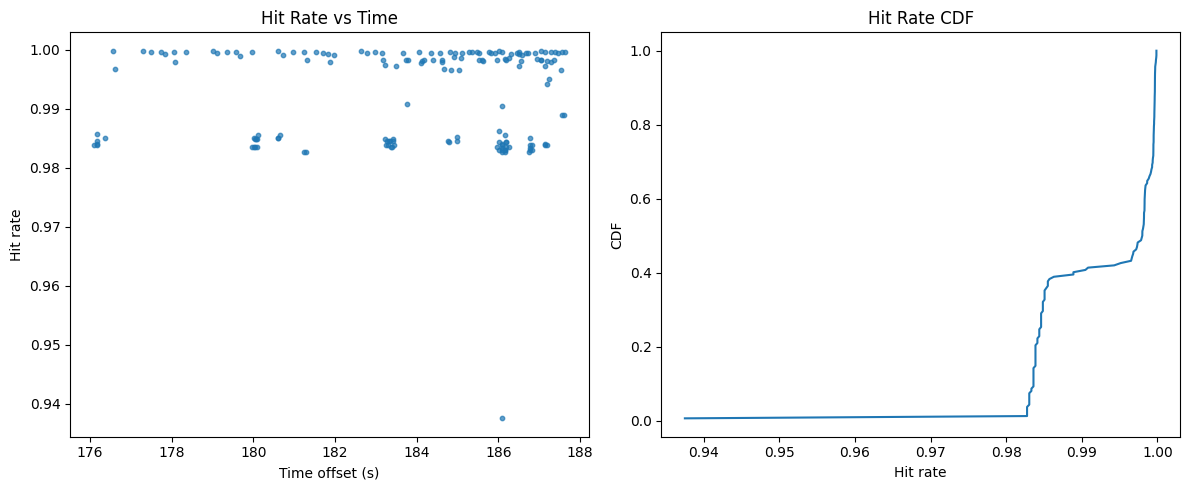

In [73]:
import os
import glob
import re
from datetime import datetime
from zoneinfo import ZoneInfo
import matplotlib.pyplot as plt
import numpy as np

pattern = re.compile(
    r"\[(?P<ts>[\d\-]+\s[\d:,]+)\].*?"
    r"(?:role:\s*(?P<role>\w+),\s*)?"  # optional role (prefill/decode)
    r"Total tokens\s+(?P<total>\d+),\s+LMCache hit tokens:\s+(?P<hit>\d+)"
)

timestamps = []
hit_rates = []

for file in glob.glob(os.path.join(run_log_dir, "worker_*.err")):
    with open(file, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            m = pattern.search(line)
            if not m:
                continue

            if m.group("role") is None:
                role = "decode"
            else:
                role = m.group("role")

            if role == "prefill":
                continue
            

            ts_str = m.group("ts")
            total_tokens = int(m.group("total"))
            hit_tokens = int(m.group("hit"))

            # convert timestamp to epoch float (Singapore TZ)
            dt = datetime.strptime(ts_str, "%Y-%m-%d %H:%M:%S,%f")
            dt = dt.replace(tzinfo=ZoneInfo("Asia/Singapore"))
            ts_float = dt.timestamp()

            # offset
            offset = ts_float - router_start_time
            hit_rate = hit_tokens / total_tokens if total_tokens > 0 else 0.0

            timestamps.append(offset)
            hit_rates.append(hit_rate)

# Convert to numpy arrays
timestamps = np.array(timestamps)
hit_rates = np.array(hit_rates)
no_hit_count = 0
for rate in hit_rates:
    if rate <= 0.1:
        no_hit_count += 1

print(f"Total {len(hit_rates)} hit rate records, {no_hit_count} with hit rate <= 0.1")

# Sort for CDF
sorted_hits = np.sort(hit_rates)
cdf = np.arange(1, len(sorted_hits) + 1) / len(sorted_hits)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: hit rate vs. time
axes[0].scatter(timestamps, hit_rates, s=10, alpha=0.7)
axes[0].set_title("Hit Rate vs Time")
axes[0].set_xlabel("Time offset (s)")
axes[0].set_ylabel("Hit rate")

# Subplot 2: CDF
axes[1].plot(sorted_hits, cdf)
axes[1].set_title("Hit Rate CDF")
axes[1].set_xlabel("Hit rate")
axes[1].set_ylabel("CDF")

plt.tight_layout()
plt.show()

# LMCache Related Metrics
## LMCache Receiver Put/Get Speed and Buffer Space Occupancy

In [74]:

import re
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from collections import defaultdict

def parse_log_file(log_content):
    """Parse the log file and extract prefill requests"""
    
    # Pattern to match the log lines
    pattern = r'INFO (\d{2}-\d{2} \d{2}:\d{2}:\d{2}) \[logger\.py:\d+\] Received request.*?params: SamplingParams\([^)]*max_tokens=(\d+)[^)]*min_tokens=(\d+)[^)]*\).*?prompt_token_ids: \[([^\]]+)\]'
    
    matches = re.findall(pattern, log_content, re.DOTALL)
    
    prefill_requests = []
    
    for match in matches:
        timestamp_str, max_tokens, min_tokens, token_ids_str = match
        
        # Check if it's a prefill request (max_tokens == min_tokens == 1)
        if max_tokens == '1' and min_tokens == '1':
            # Parse timestamp
            timestamp = datetime.strptime(f"2025-{timestamp_str}", "%Y-%m-%d %H:%M:%S")
            
            # Count tokens in prompt_token_ids
            token_ids = [int(x.strip()) for x in token_ids_str.split(',')]
            context_length = len(token_ids)
            
            prefill_requests.append({
                'timestamp': timestamp,
                'context_length': context_length
            })
    
    return prefill_requests

def calculate_token_rate(requests, window_seconds=5, base_time=None):
    """Calculate token arrival rate averaged over time windows"""
    
    if not requests:
        return [], []
    
    # Sort requests by timestamp
    requests.sort(key=lambda x: x['timestamp'])
    
    # Get the first timestamp as reference
    if base_time is not None:
        start_time = base_time
    else:
        start_time = requests[0]['timestamp']
    
    # Group requests by time windows
    time_windows = defaultdict(int)  # time_offset -> total_tokens
    
    for req in requests:
        time_offset = (req['timestamp'] - start_time).total_seconds()
        window_start = int(time_offset // window_seconds) * window_seconds
        time_windows[window_start] += req['context_length']
    
    # Convert to lists for plotting
    times = sorted(time_windows.keys())
    token_rates = [time_windows[t] / window_seconds for t in times]  # tokens per second
    
    return times, token_rates




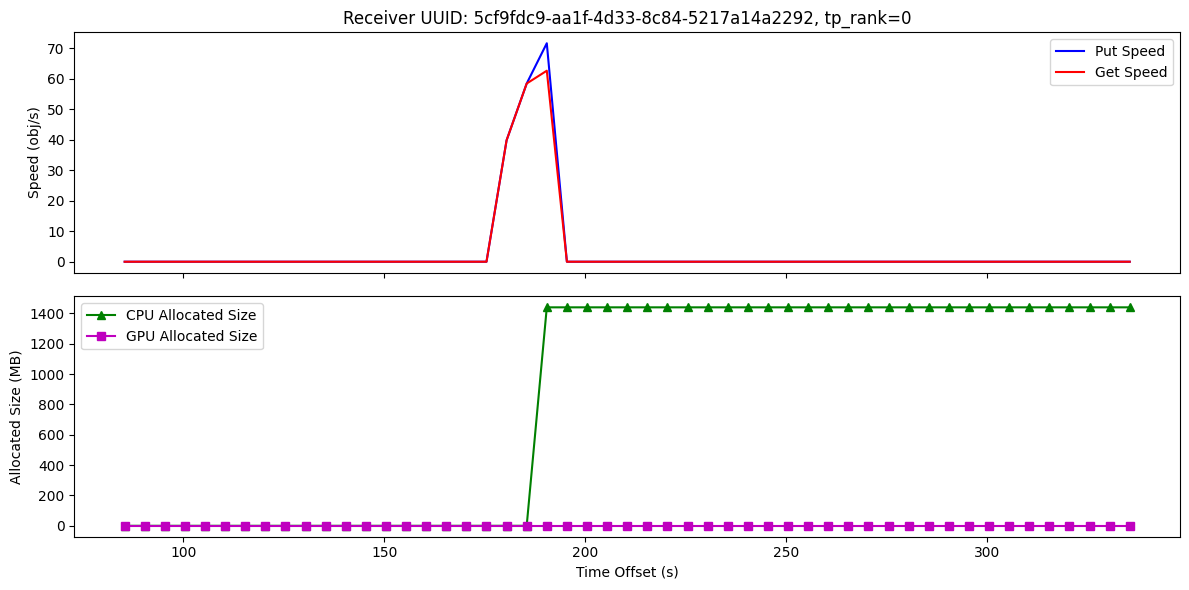

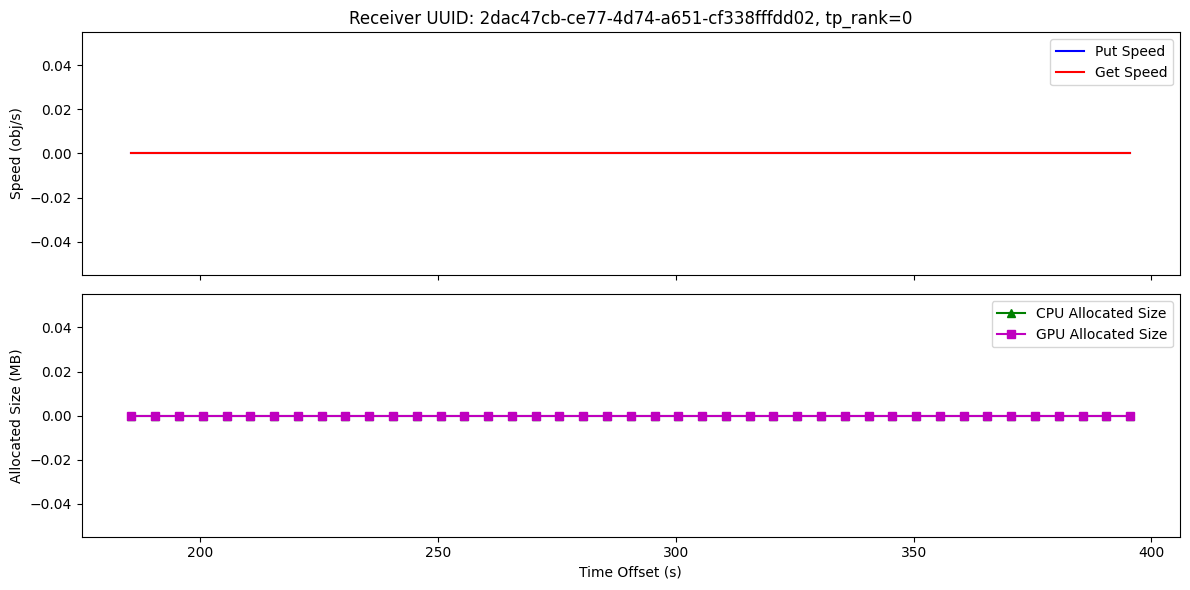

In [75]:
import re
import matplotlib.pyplot as plt
from datetime import datetime, timezone, timedelta
import os
from collections import defaultdict
import glob

# Adjust regex to capture CPU and GPU allocated sizes
pattern = re.compile(
    r"\[(?P<ts>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3})\].*?"
    r"\[ReceiverStat\],.*?"
    r"uuid:(?P<uuid>[a-f0-9\-]+).*?"
    r"(?:tp_rank:\s*(?P<tp_rank>\d+),.*?)?"   # optional tp_rank
    r"total gpu allocated size:\s+(?P<size_gpu>[\d.]+)\s+MB.*?"
    r"total cpu allocated size:\s+(?P<size_cpu>[\d.]+)\s+MB.*?"
    r"put_speed:\s+(?P<put>[\d.]+)\s+obj/s.*?"
    r"get_speed:\s+(?P<get>[\d.]+)\s+obj/s"
)
# Data structure per UUID
data = defaultdict(
    lambda: defaultdict(
        lambda: {"ts": [], "size_cpu": [], "size_gpu": [], "put": [], "get": []}
    )
)

# Parse all worker_*.err files
log_files = glob.glob(os.path.join(run_log_dir, "worker_*.err"))

if not log_files:
    print(f"No worker_*.err files found under {run_log_dir}")

for file_path in log_files:
    with open(file_path, "r") as f:
        for line in f:
            m = pattern.search(line)
            if not m:
                continue
            if m.group("tp_rank") is None:
                tp_rank = 0
            else:
                tp_rank = int(m.group("tp_rank"))
            # data[uuid][tp_rank] = {}
            ts = datetime.strptime(m.group("ts"), "%Y-%m-%d %H:%M:%S,%f")
            ts = ts.replace(tzinfo=timezone(timedelta(hours=8)))  # Singapore time
            uuid = m.group("uuid")
            data[uuid][tp_rank]["ts"].append(ts)
            data[uuid][tp_rank]["size_cpu"].append(float(m.group("size_cpu")))
            data[uuid][tp_rank]["size_gpu"].append(float(m.group("size_gpu")))
            data[uuid][tp_rank]["put"].append(float(m.group("put")))
            data[uuid][tp_rank]["get"].append(float(m.group("get")))

if not data:
    print("No matching log lines found in any worker_*.err")

# Plot per-UUID
for uuid, metrics in data.items():
    # Sort by timestamp in case logs from multiple files are interleaved
    num_tp_rank = len(metrics.keys())
    fig, axes = plt.subplots(2, num_tp_rank, figsize=(12, 6), sharex=True)
    for tp_rank, vals in metrics.items():
        sorted_entries = sorted(
            zip(vals["ts"], vals["size_cpu"], vals["size_gpu"], vals["put"], vals["get"])
        )
        ts_sorted, size_cpu_sorted, size_gpu_sorted, put_sorted, get_sorted = zip(*sorted_entries)

        time_offsets = [t.timestamp() - router_start_time for t in ts_sorted]

        if num_tp_rank > 1:
            ax1 = axes[0][tp_rank]
            ax2 = axes[1][tp_rank]
        else:
            ax1 = axes[0]
            ax2 = axes[1]
        # ax1 = axes[0][tp_rank]
        # ax2 = axes[1][tp_rank]
        ax1.set_title(f"Receiver UUID: {uuid}, tp_rank={tp_rank}")

        # Put/Get speed
        ax1.plot(time_offsets, put_sorted, 'b-', label="Put Speed")
        ax1.plot(time_offsets, get_sorted, 'r-', label="Get Speed")
        ax1.set_ylabel("Speed (obj/s)")
        ax1.legend()

        # CPU/GPU allocated size
        ax2.plot(time_offsets, size_cpu_sorted, 'g-', marker='^', label="CPU Allocated Size")
        ax2.plot(time_offsets, size_gpu_sorted, 'm-', marker='s', label="GPU Allocated Size")
        ax2.set_xlabel("Time Offset (s)")
        ax2.set_ylabel("Allocated Size (MB)")
        ax2.legend()

        plt.tight_layout()



## LMCache Sender Buffer Occupancy

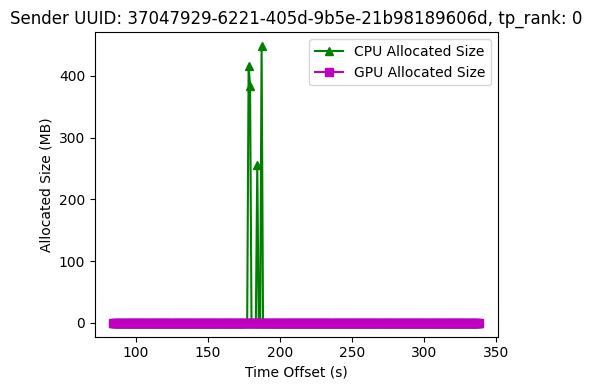

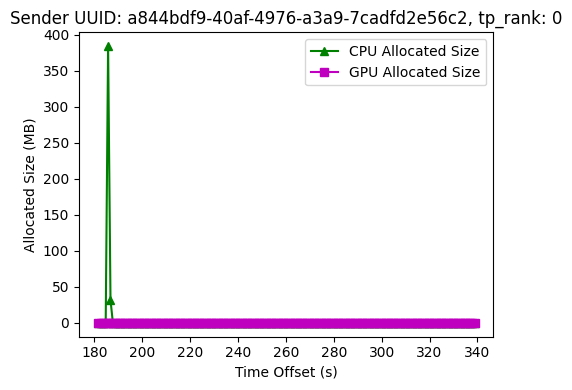

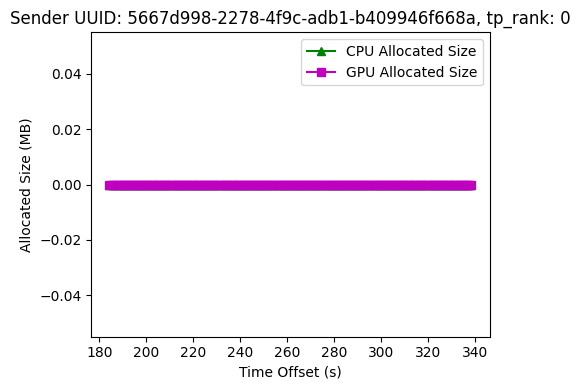

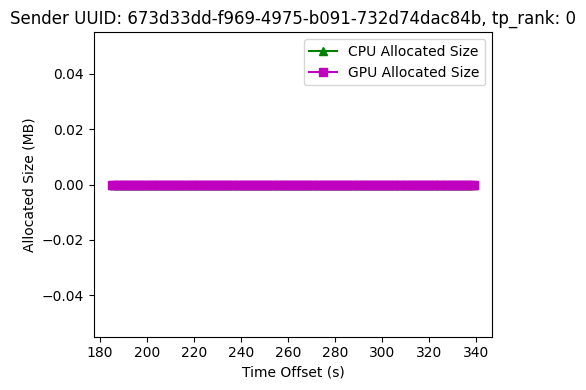

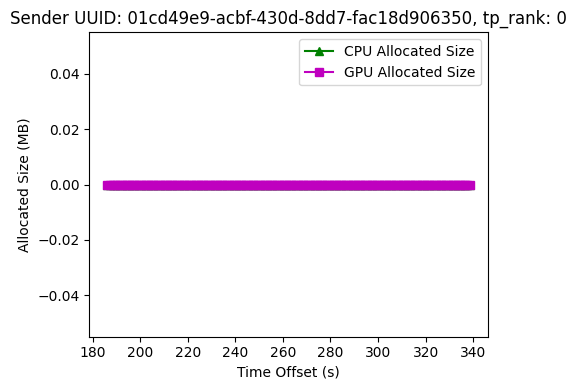

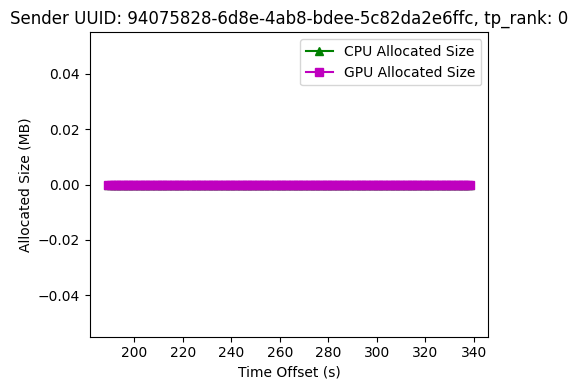

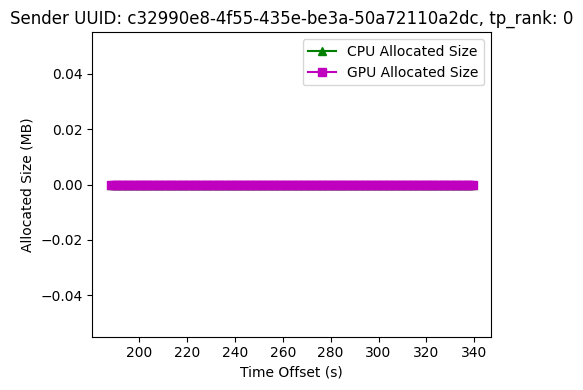

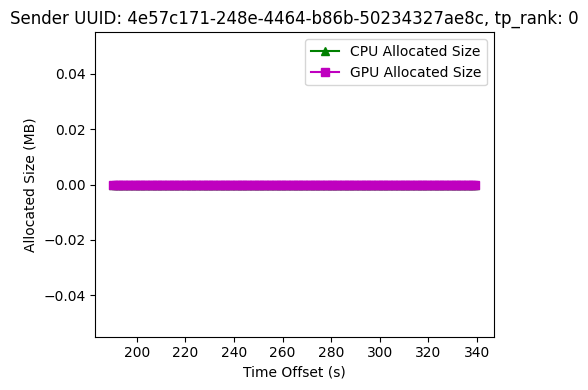

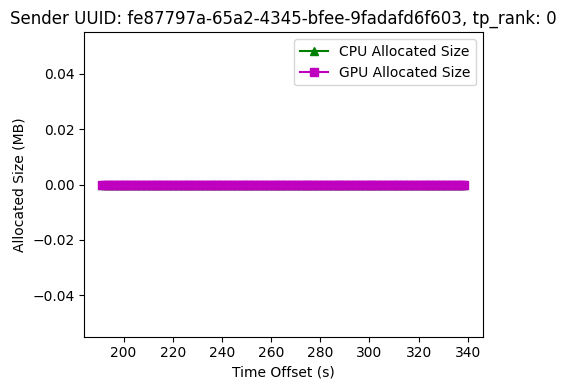

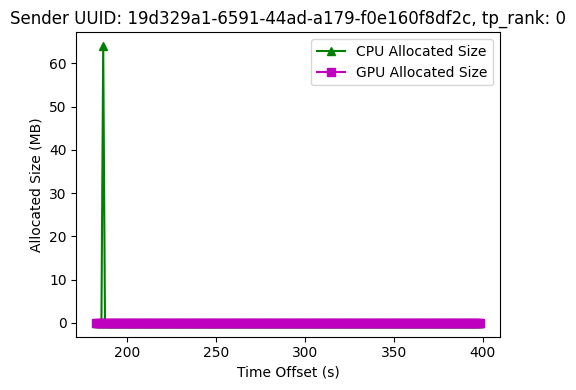

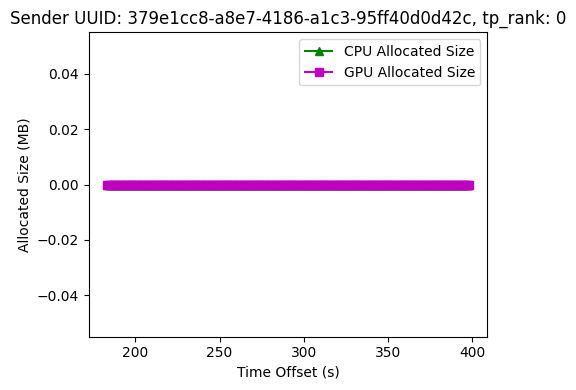

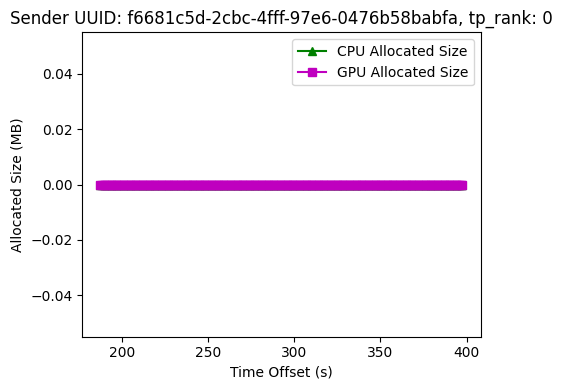

In [76]:

import re
import matplotlib.pyplot as plt
from datetime import datetime, timezone, timedelta
import os
from collections import defaultdict
import glob

# Adjust regex to capture CPU and GPU allocated sizes
pattern = re.compile(
    r"\[(?P<ts>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3})\].*?"
    r"\[SenderStat\],.*?"
    r"uuid:(?P<uuid>[a-f0-9\-]+).*?"
    r"(?:tp_rank:\s*(?P<tp_rank>\d+),.*?)?"   # optional tp_rank
    r"total gpu allocated size:\s+(?P<size_gpu>[\d.]+)\s+MB.*?"
    r"total cpu allocated size:\s+(?P<size_cpu>[\d.]+)\s+MB.*?"
)

# Data structure per UUID
data = defaultdict(
    lambda: defaultdict(
        lambda: {"ts": [], "size_cpu": [], "size_gpu": [], "put": [], "get": []}
    )
)

# Parse all worker_*.err files
log_files = glob.glob(os.path.join(run_log_dir, "worker_*.err"))

if not log_files:
    print(f"No worker_*.err files found under {run_log_dir}")

for file_path in log_files:
    with open(file_path, "r") as f:
        for line in f:
            m = pattern.search(line)
            if not m:
                continue
            if m.group("tp_rank") is None:
                tp_rank = 0
            else:
                tp_rank = int(m.group("tp_rank"))
            ts = datetime.strptime(m.group("ts"), "%Y-%m-%d %H:%M:%S,%f")
            ts = ts.replace(tzinfo=timezone(timedelta(hours=8)))  # Singapore time
            uuid = m.group("uuid")
            data[uuid][tp_rank]["ts"].append(ts)
            data[uuid][tp_rank]["size_cpu"].append(float(m.group("size_cpu")))
            data[uuid][tp_rank]["size_gpu"].append(float(m.group("size_gpu")))

if not data:
    print("No matching log lines found in any worker_*.err")

# Plot per-UUID
for uuid, metrics in data.items():
    num_tp_rank = len(metrics.keys())
    fig, axes = plt.subplots(1, num_tp_rank, figsize=(5*num_tp_rank, 4), sharex=True)
    for tp_rank, vals in metrics.items():

        # Sort by timestamp in case logs from multiple files are interleaved
        sorted_entries = sorted(
            zip(vals["ts"], vals["size_cpu"], vals["size_gpu"])
        )
        ts_sorted, size_cpu_sorted, size_gpu_sorted = zip(*sorted_entries)

        time_offsets = [t.timestamp() - router_start_time for t in ts_sorted]
        if num_tp_rank > 1:
            ax = axes[tp_rank]
        else:
            ax = axes

        ax.set_title(f"Sender UUID: {uuid}, tp_rank: {tp_rank}")


        # CPU/GPU allocated size
        ax.plot(time_offsets, size_cpu_sorted, 'g-', marker='^', label="CPU Allocated Size")
        ax.plot(time_offsets, size_gpu_sorted, 'm-', marker='s', label="GPU Allocated Size")
        ax.set_xlabel("Time Offset (s)")
        ax.set_ylabel("Allocated Size (MB)")
        ax.legend()

        plt.tight_layout()


## LMCache Finished Speed

the first request sent at 175.5514509677887s
the first request finished at 176.0251109600067s
Number of time windows: 3
121257
time duration: 11.879756927490234s
avg finished speed: 10207.027024215153 tok/s


Text(0.5, 1.0, 'Finished Speed over Time')

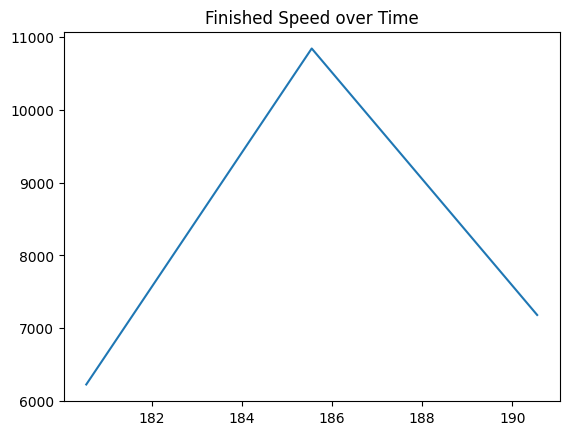

In [77]:

# Lists to store event timestamps when requests are completed
TIME_WINDOW = 5
decode_times = []

# Fill in event lists with only SLO-satisfying requests
finished_tokens = []
prefill_tokens = []
decode_tokens = []
tpots = []
for request_data in loadgen_data:
    if 'error' in request_data:
        continue

    request = RequestData.init_from_dict(request_data)

    arrival_time = request.arrival_time
    decode_finished_time = arrival_time + request.ttft + request.waiting_latency + request.decode_latency


    decode_times.append(decode_finished_time)
    finished_tokens.append(request.decode_tokens+request.prompt_tokens)
    prefill_tokens.append(request.prompt_tokens)
    decode_tokens.append(request.decode_tokens)
    tpot = request.decode_latency / request.decode_tokens if request.decode_tokens > 0 else 0
    tpots.append(tpot)

assert len(decode_times) == len(finished_tokens)

# Step 1: Normalize decode_times to time offsets from base_time
# Assume decode_times[0] is a float Unix timestamp
ts = decode_times[0]

# Define Singapore timezone (UTC+8)
from datetime import datetime, timezone, timedelta
sg_timezone = timezone(timedelta(hours=8))

# Convert to datetime with Singapore timezone
dt_sg = datetime.fromtimestamp(ts, tz=sg_timezone)

# Print it
# base_timestamp = base_time.timestamp()
# time_offsets = [t - base_time.timestamp() for t in decode_times]
time_offsets = [t - router_start_time for t in decode_times]

# Step 2: Bucket the values into fixed-size time windows
max_time = router_end_time - router_start_time
min_time = first_request_sendtime - router_start_time
num_windows = int(np.ceil((max_time - min_time) / TIME_WINDOW))

print(f"the first request sent at {first_request_sendtime - router_start_time}s")
print(f"the first request finished at {min(decode_times) - router_start_time}s")
print(f"Number of time windows: {num_windows}")

window_edges = [i * TIME_WINDOW + min_time for i in range(num_windows + 1)]
window_avgs = []
window_centers = []
r_avgs = []
tpot_avgs = []

for i in range(num_windows):
    start = window_edges[i]
    end = window_edges[i + 1]

    # Gather tokens in this time window
    tokens_in_window = [
        tok  for t, tok in zip(time_offsets, finished_tokens)
        if start <= t < end
    ]
    prefill_toks_in_window = [
        tok  for t, tok in zip(time_offsets, prefill_tokens)
        if start <= t < end
    ]

    decode_toks_in_window = [
        tok  for t, tok in zip(time_offsets, decode_tokens)
        if start <= t < end
    ]

    tpot_in_window = [
        tpot for t, tpot in zip(time_offsets, tpots)
        if start <= t < end
    ]

    if tokens_in_window:
        avg = sum(tokens_in_window) / TIME_WINDOW
        r = np.mean(np.asarray(prefill_toks_in_window) / np.array(decode_toks_in_window))
    else:
        r = 0
        avg = 0

    window_avgs.append(avg)
    r_avgs.append(r)
    tpot_avgs.append(np.mean(tpot_in_window) if tpot_in_window else 0)
    # window_centers.append((start + end) / 2)
    window_centers.append(end)
first_request_arrival_time = float('inf')
last_request_finished_time = 0
token_count = 0

for request in requests:
    if request.arrival_time < first_request_arrival_time:
        first_request_arrival_time = request.arrival_time
    request_finished_time = request.arrival_time + request.ttft + request.waiting_latency + request.decode_latency
    if request_finished_time > last_request_finished_time:
        last_request_finished_time = request_finished_time
    token_count += request.prompt_tokens + request.decode_tokens
print(token_count)
print(f"time duration: {last_request_finished_time - first_request_arrival_time}s")
avg_finished_rate = token_count / (last_request_finished_time - first_request_arrival_time)


# Step 3: Plot
plt.figure()
plt.plot(window_centers, window_avgs, label='Finished Speed')
print(f"avg finished speed: {avg_finished_rate} tok/s")
# plt.figure()
plt.title('Finished Speed over Time')
# r_avgs_array = np.array(r_avgs)
# tpot_avgs_array = np.array(tpot_avgs)
# calculated_finished_speed = (r_avgs_array+1) / tpot_avgs_array
# ax1.plot(window_centers, calculated_finished_speed, label='Calculated Finished Speed')

# Memory Leakage Monitor

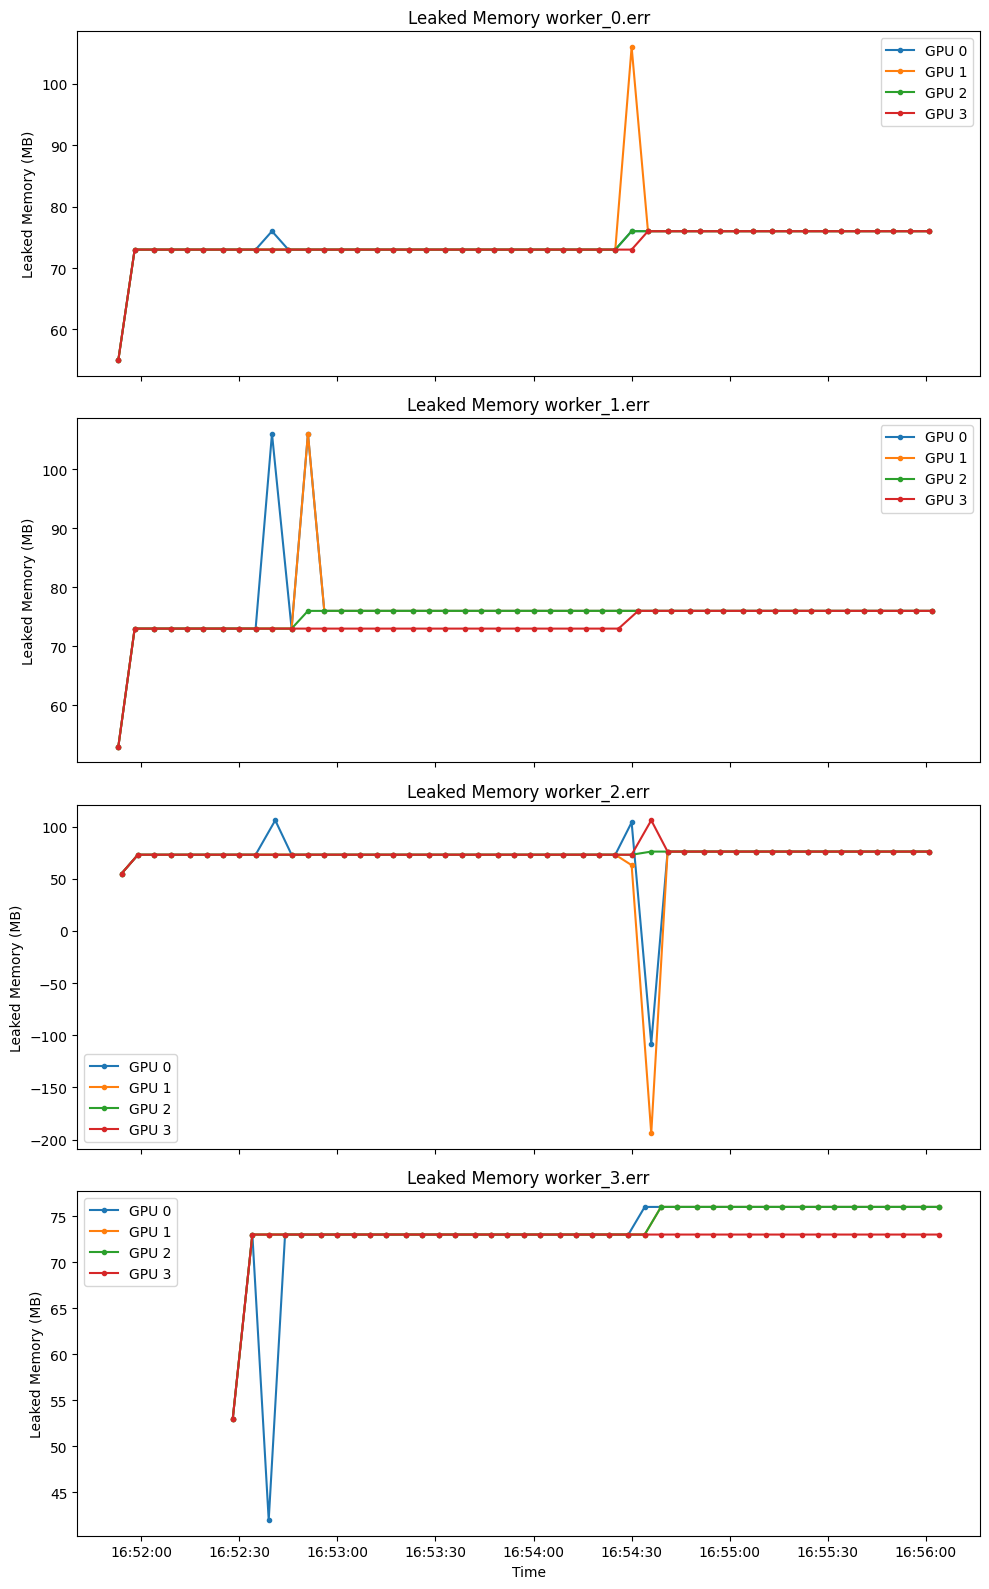

In [78]:

import os
import re
import matplotlib.pyplot as plt
from datetime import datetime
# Regex to capture timestamp and GPU leak list
line_pattern = re.compile(
    r"\[(?P<ts>[\d\-]+\s[\d:]+)\]\s+\[Leaked Memory\]\s+(?P<gpus>\[.*\])"
)

def parse_worker_log(filepath):
    """Parse a worker_x.err file, return timestamps and gpu_leaks dict."""
    timestamps = []
    gpu_leaks = {}  # {gpu_id: [values]}
    
    with open(filepath, "r") as f:
        for line in f:
            m = line_pattern.search(line)
            if not m:
                continue
            
            # Parse timestamp
            ts = datetime.strptime(m.group("ts"), "%Y-%m-%d %H:%M:%S")
            timestamps.append(ts)
            
            # Parse GPU leaks list safely with eval
            gpus = eval(m.group("gpus"))  # e.g. ['GPU 0: 105 MB', ...]
            for gpu_entry in gpus:
                gpu_id, mem_str = gpu_entry.split(":")
                gpu_id = gpu_id.strip()  # "GPU 0"
                mem = int(mem_str.strip().replace("MB", ""))
                
                if gpu_id not in gpu_leaks:
                    gpu_leaks[gpu_id] = []
                gpu_leaks[gpu_id].append(mem)
    
    return timestamps, gpu_leaks


def plot_all_workers(run_log_dir):
    worker_files = sorted(
        [f for f in os.listdir(run_log_dir) if f.startswith("worker_") and f.endswith(".err")]
    )
    
    num_workers = len(worker_files)
    fig, axes = plt.subplots(num_workers, 1, figsize=(10, 4 * num_workers), sharex=True)
    
    if num_workers == 1:
        axes = [axes]  # Ensure iterable
    
    for ax, worker_file in zip(axes, worker_files):
        filepath = os.path.join(run_log_dir, worker_file)
        timestamps, gpu_leaks = parse_worker_log(filepath)
        
        for gpu_id, mem_values in gpu_leaks.items():
            ax.plot(timestamps, mem_values, label=gpu_id, marker="o", markersize=3)
        
        ax.set_title(f"Leaked Memory {worker_file}")
        ax.set_ylabel("Leaked Memory (MB)")
        ax.legend()
    
    axes[-1].set_xlabel("Time")
    plt.tight_layout()
    plt.show()


plot_all_workers(run_log_dir)

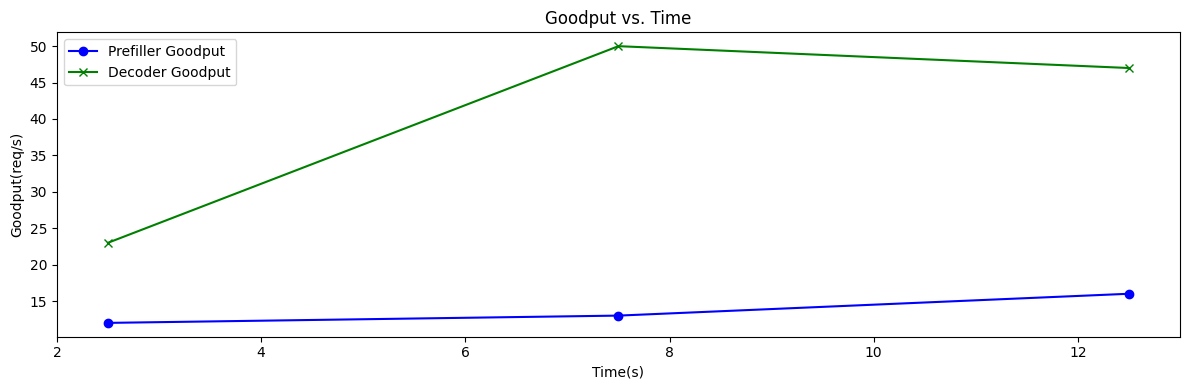

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Define a fixed time window for goodput calculation (in seconds)
TIME_WINDOW = 5.0

# Lists to store event timestamps when requests are completed
prefill_times = []
decode_times = []

# Fill in event lists with only SLO-satisfying requests
for request_data in loadgen_data:
    if 'error' in request_data:
        continue

    request = RequestData.init_from_dict(request_data)
    # if not request.satisfy_SLO():
    #     continue

    arrival_time = request.arrival_time
    prefill_finished_time = arrival_time + request.ttft
    decode_finished_time = arrival_time + request.ttft + request.waiting_latency + request.decode_latency

    if request.satisfy_prefill_SLO():
        prefill_times.append(prefill_finished_time)

    if request.satisfy_decode_SLO():
        decode_times.append(decode_finished_time)
    # prefill_times.append(prefill_finished_time)
    # decode_times.append(decode_finished_time)

# Convert to numpy arrays
prefill_times = np.array(prefill_times)
decode_times = np.array(decode_times)

# Normalize all times relative to the first request
start_time = min(prefill_times.min(), decode_times.min())
prefill_times -= start_time
decode_times -= start_time

# Compute time bins
end_time = max(prefill_times.max(), decode_times.max())
bins = np.arange(0, end_time + TIME_WINDOW, TIME_WINDOW)

# Histogram = number of completed requests in each time bin
prefill_goodput, _ = np.histogram(prefill_times, bins)
decode_goodput, _ = np.histogram(decode_times, bins)

# Midpoints for plotting
bin_midpoints = bins[:-1] + TIME_WINDOW / 2

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(bin_midpoints, prefill_goodput, label='Prefiller Goodput', color='blue', marker='o')
plt.plot(bin_midpoints, decode_goodput, label='Decoder Goodput', color='green', marker='x')
plt.xlabel('Time(s)')
plt.ylabel(f'Goodput(req/s)')
plt.title('Goodput vs. Time')
plt.legend()
plt.tight_layout()
plt.show()

# Power Monitor

Average power: 1033.1747368421052 W


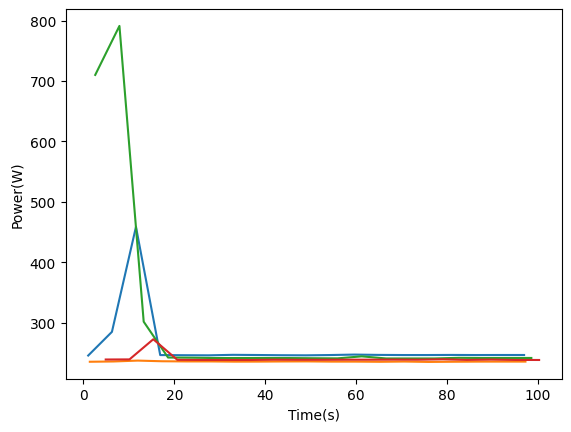

In [80]:
power_datas = []
with open(f"{run_log_dir}/power.json", 'r') as f:
    for line in f:
        power_data = json.loads(line)
        power_datas.append(power_data)
power_datas_map = {}
for data in power_datas:
    timestamp = data['timestamp'] - first_request_sendtime
    if timestamp < 0:
        continue
    worker = data['worker']
    power_sum = sum(data['power_readings'])
    if worker not in power_datas_map:
        power_datas_map[worker] = {}
        power_datas_map[worker]['timestamps'] = []
        power_datas_map[worker]['power_sums'] = []
    power_datas_map[worker]['timestamps'].append(timestamp)
    power_datas_map[worker]['power_sums'].append(power_sum)

plt.figure()
total_avg_power = 0
for worker, pdata in power_datas_map.items():
    plt.plot(pdata['timestamps'], pdata['power_sums'], label=f"{worker}")
    avg_power = np.mean(pdata['power_sums'])
    total_avg_power += avg_power

plt.xlabel(f"Time(s)")
plt.ylabel(f"Power(W)")
print(f"Average power: {total_avg_power} W")

# Drift Monitor

We count 2554 requests with drift info, max drift: 4ms


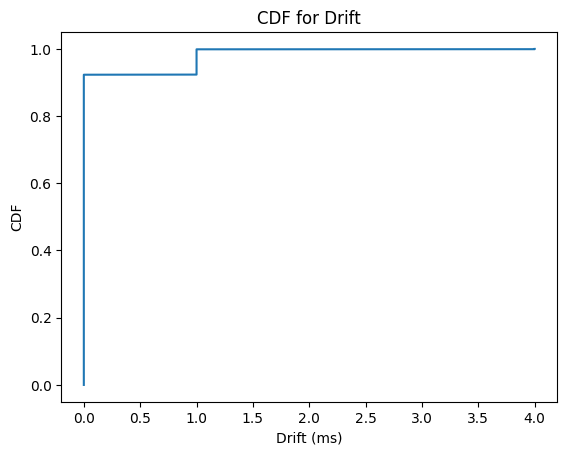

In [81]:
import json
request_datas = []
with open(f"{run_log_dir}/loadgen_result.json", "r") as f:
    for line in f.readlines():
        request_data = json.loads(line)
        request_datas.append(request_data)

drifts = []
for request in request_datas:
    drifts.append(request['response']['drift'])

print(f"We count {len(drifts)} requests with drift info, max drift: {max(drifts)}ms")
fig, ax = plt.subplots()
ax = plot_cdf(drifts, ax)
ax.set_xlabel("Drift (ms)")
ax.set_title(f"CDF for Drift")
plt.show()